# Experiment 2.6
Preliminary HPO exploration for Transformer because never really done before for TS

General takeaways from preliminary analysis:
Smaller models: larger lr is best (lr > 0.001)
Larger models: lr 0.0005 or 0.0001
Small horizon: bs 32
Large horizon: bs 64

Goal:</br>
HPO of Transformer on ftS load, pred_len=24 </br>

Result: </br>


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.8'

In [29]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [30]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.8_metrics.csv", index_col=0)

In [31]:
hpo_table.sum(axis=0)

learning_rate        0.198000
batch_size        3840.000000
e_layers           840.000000
d_layers           120.000000
d_model          23808.000000
seq_len          25920.000000
pred_len          2880.000000
MSE                  4.040042
MAE                 15.283415
Epochs            1273.000000
Time[min]          831.000000
Params[Mio.]       359.360000
Max_mem[MB]      23994.480000
dtype: float64

In [32]:
hpo_table.groupby("Params[Mio.]").mean()

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
Params[Mio.]                                                                    
0.02                0.00165        32.0       3.0       1.0     32.0     96.0   
0.03                0.00165        32.0       3.0       1.0     32.0    336.0   
0.04                0.00165        32.0       6.0       1.0     32.0     96.0   
0.05                0.00165        32.0       6.0       1.0     32.0    336.0   
0.08                0.00165        32.0       7.5       1.0     48.0     96.0   
0.09                0.00165        32.0      12.0       1.0     32.0    336.0   
0.10                0.00165        32.0       3.0       1.0     64.0    336.0   
0.16                0.00165        32.0       6.0       1.0     64.0     96.0   
0.17                0.00165        32.0       6.0       1.0     64.0    336.0   
0.31                0.00165        32.0       7.5       1.0     96.0     96.0   
0.33                0.00165        32.0      12.0       1.0     64.0    336.0   
0.35                0.00165        32.0       3.0       1.0    128.0    336.0   
0.61                0.00165        32.0       6.0       1.0    128.0     96.0   
0.64                0.00165        32.0       6.0       1.0    128.0    336.0   
1.21                0.00165        32.0      12.0       1.0    128.0     96.0   
1.22                0.00165        32.0       3.0       1.0    256.0     96.0   
1.24                0.00165        32.0      12.0       1.0    128.0    336.0   
1.28                0.00165        32.0       3.0       1.0    256.0    336.0   
2.41                0.00165        32.0       6.0       1.0    256.0     96.0   
2.47                0.00165        32.0       6.0       1.0    256.0    336.0   
4.78                0.00165        32.0      12.0       1.0    256.0     96.0   
4.80                0.00165        32.0       3.0       1.0    512.0     96.0   
4.84                0.00165        32.0      12.0       1.0    256.0    336.0   
4.92                0.00165        32.0       3.0       1.0    512.0    336.0   
9.53                0.00165        32.0       6.0       1.0    512.0     96.0   
9.65                0.00165        32.0       6.0       1.0    512.0    336.0   
19.00               0.00165        32.0      12.0       1.0    512.0     96.0   
19.12               0.00165        32.0      12.0       1.0    512.0    336.0   

              pred_len       MSE       MAE  Epochs  Time[min]  Max_mem[MB]  
Params[Mio.]                                                                
0.02              24.0  0.040387  0.138309   14.00      4.500      146.610  
0.03              24.0  0.036259  0.132780   15.00      7.500      147.430  
0.04              24.0  0.038453  0.134991   12.25      6.250      148.470  
0.05              24.0  0.034427  0.130919   14.25      9.750      149.290  
0.08              24.0  0.038770  0.135587   15.00     10.000      150.600  
0.09              24.0  0.033713  0.130762   13.25     14.750      153.020  
0.10              24.0  0.033504  0.127824   12.00      6.000      149.900  
0.16              24.0  0.038147  0.134124   10.25      5.250      153.080  
0.17              24.0  0.033314  0.128942   11.00      7.250      153.990  
0.31              24.0  0.036020  0.130195   12.75      7.875      157.815  
0.33              24.0  0.033666  0.130458    9.75     10.250      162.160  
0.35              24.0  0.029941  0.121442   10.50      5.250      155.460  
0.61              24.0  0.035032  0.127990   10.25      5.500      163.510  
0.64              24.0  0.028952  0.120686   10.25      6.750      164.590  
1.21              24.0  0.033607  0.125666    9.00      8.000      181.780  
1.22              24.0  0.031928  0.120090    9.75      3.000      170.250  
1.24              24.0  0.028879  0.121270   10.75     11.500      182.860  
1.28              24.0  0.027077  0.114786   10.75      5.250      171.680  
2.41              24.0  0.031611  0.121143 

<Axes: title={'center': 'MSE'}, xlabel='Params[Mio.]'>

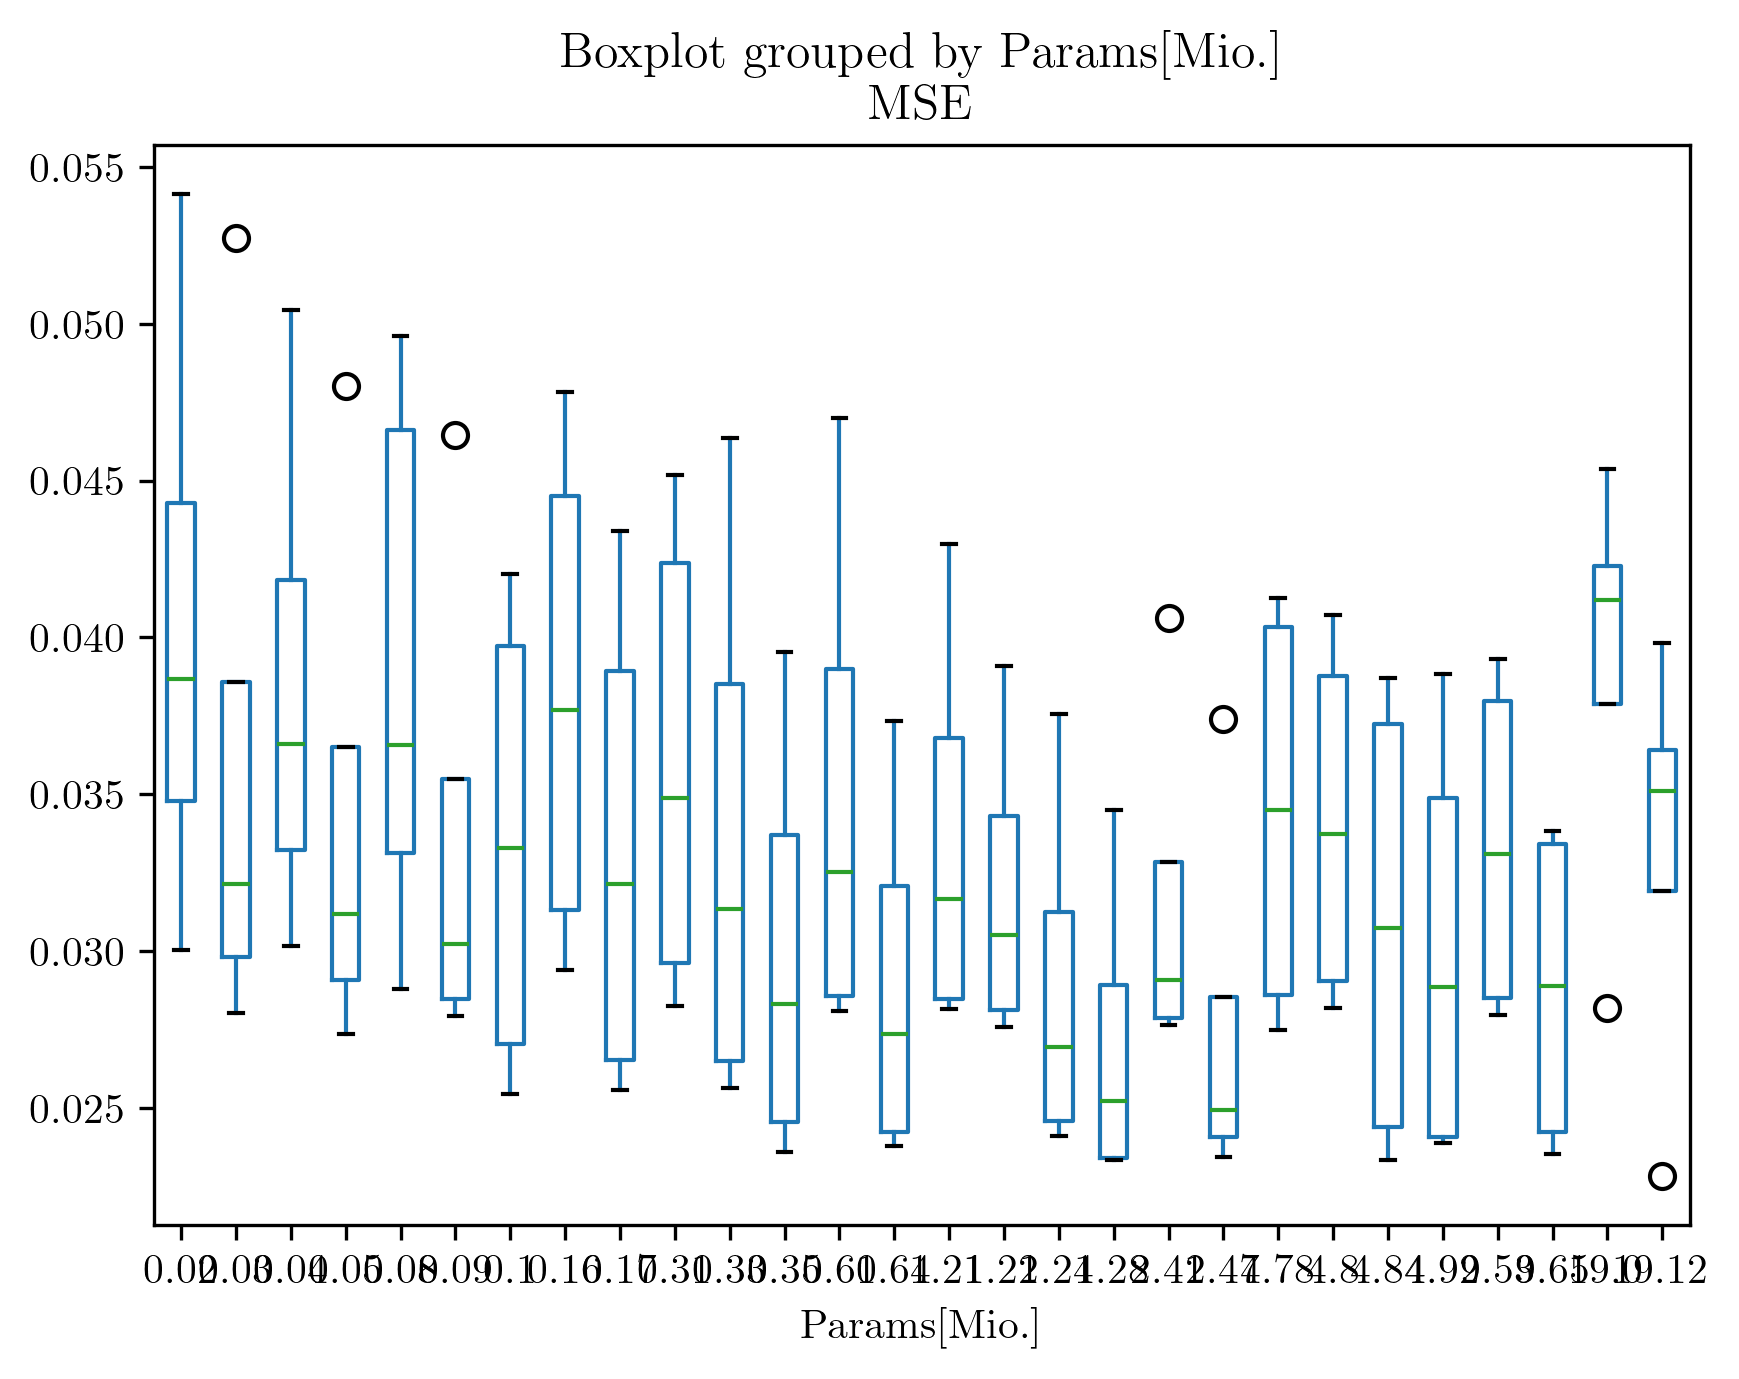

In [33]:
hpo_table.boxplot(by="Params[Mio.]", column="MSE", grid=False)

                       learning_rate  batch_size  d_layers  d_model  seq_len  \
e_layers Params[Mio.]                                                          
3        0.02                0.00165        32.0       1.0     32.0     96.0   
         0.03                0.00165        32.0       1.0     32.0    336.0   
         0.08                0.00165        32.0       1.0     64.0     96.0   
         0.10                0.00165        32.0       1.0     64.0    336.0   
         0.31                0.00165        32.0       1.0    128.0     96.0   
         0.35                0.00165        32.0       1.0    128.0    336.0   
         1.22                0.00165        32.0       1.0    256.0     96.0   
         1.28                0.00165        32.0       1.0    256.0    336.0   
         4.80                0.00165        32.0       1.0    512.0     96.0   
         4.92                0.00165        32.0       1.0    512.0    336.0   
6        0.04                0.00165    

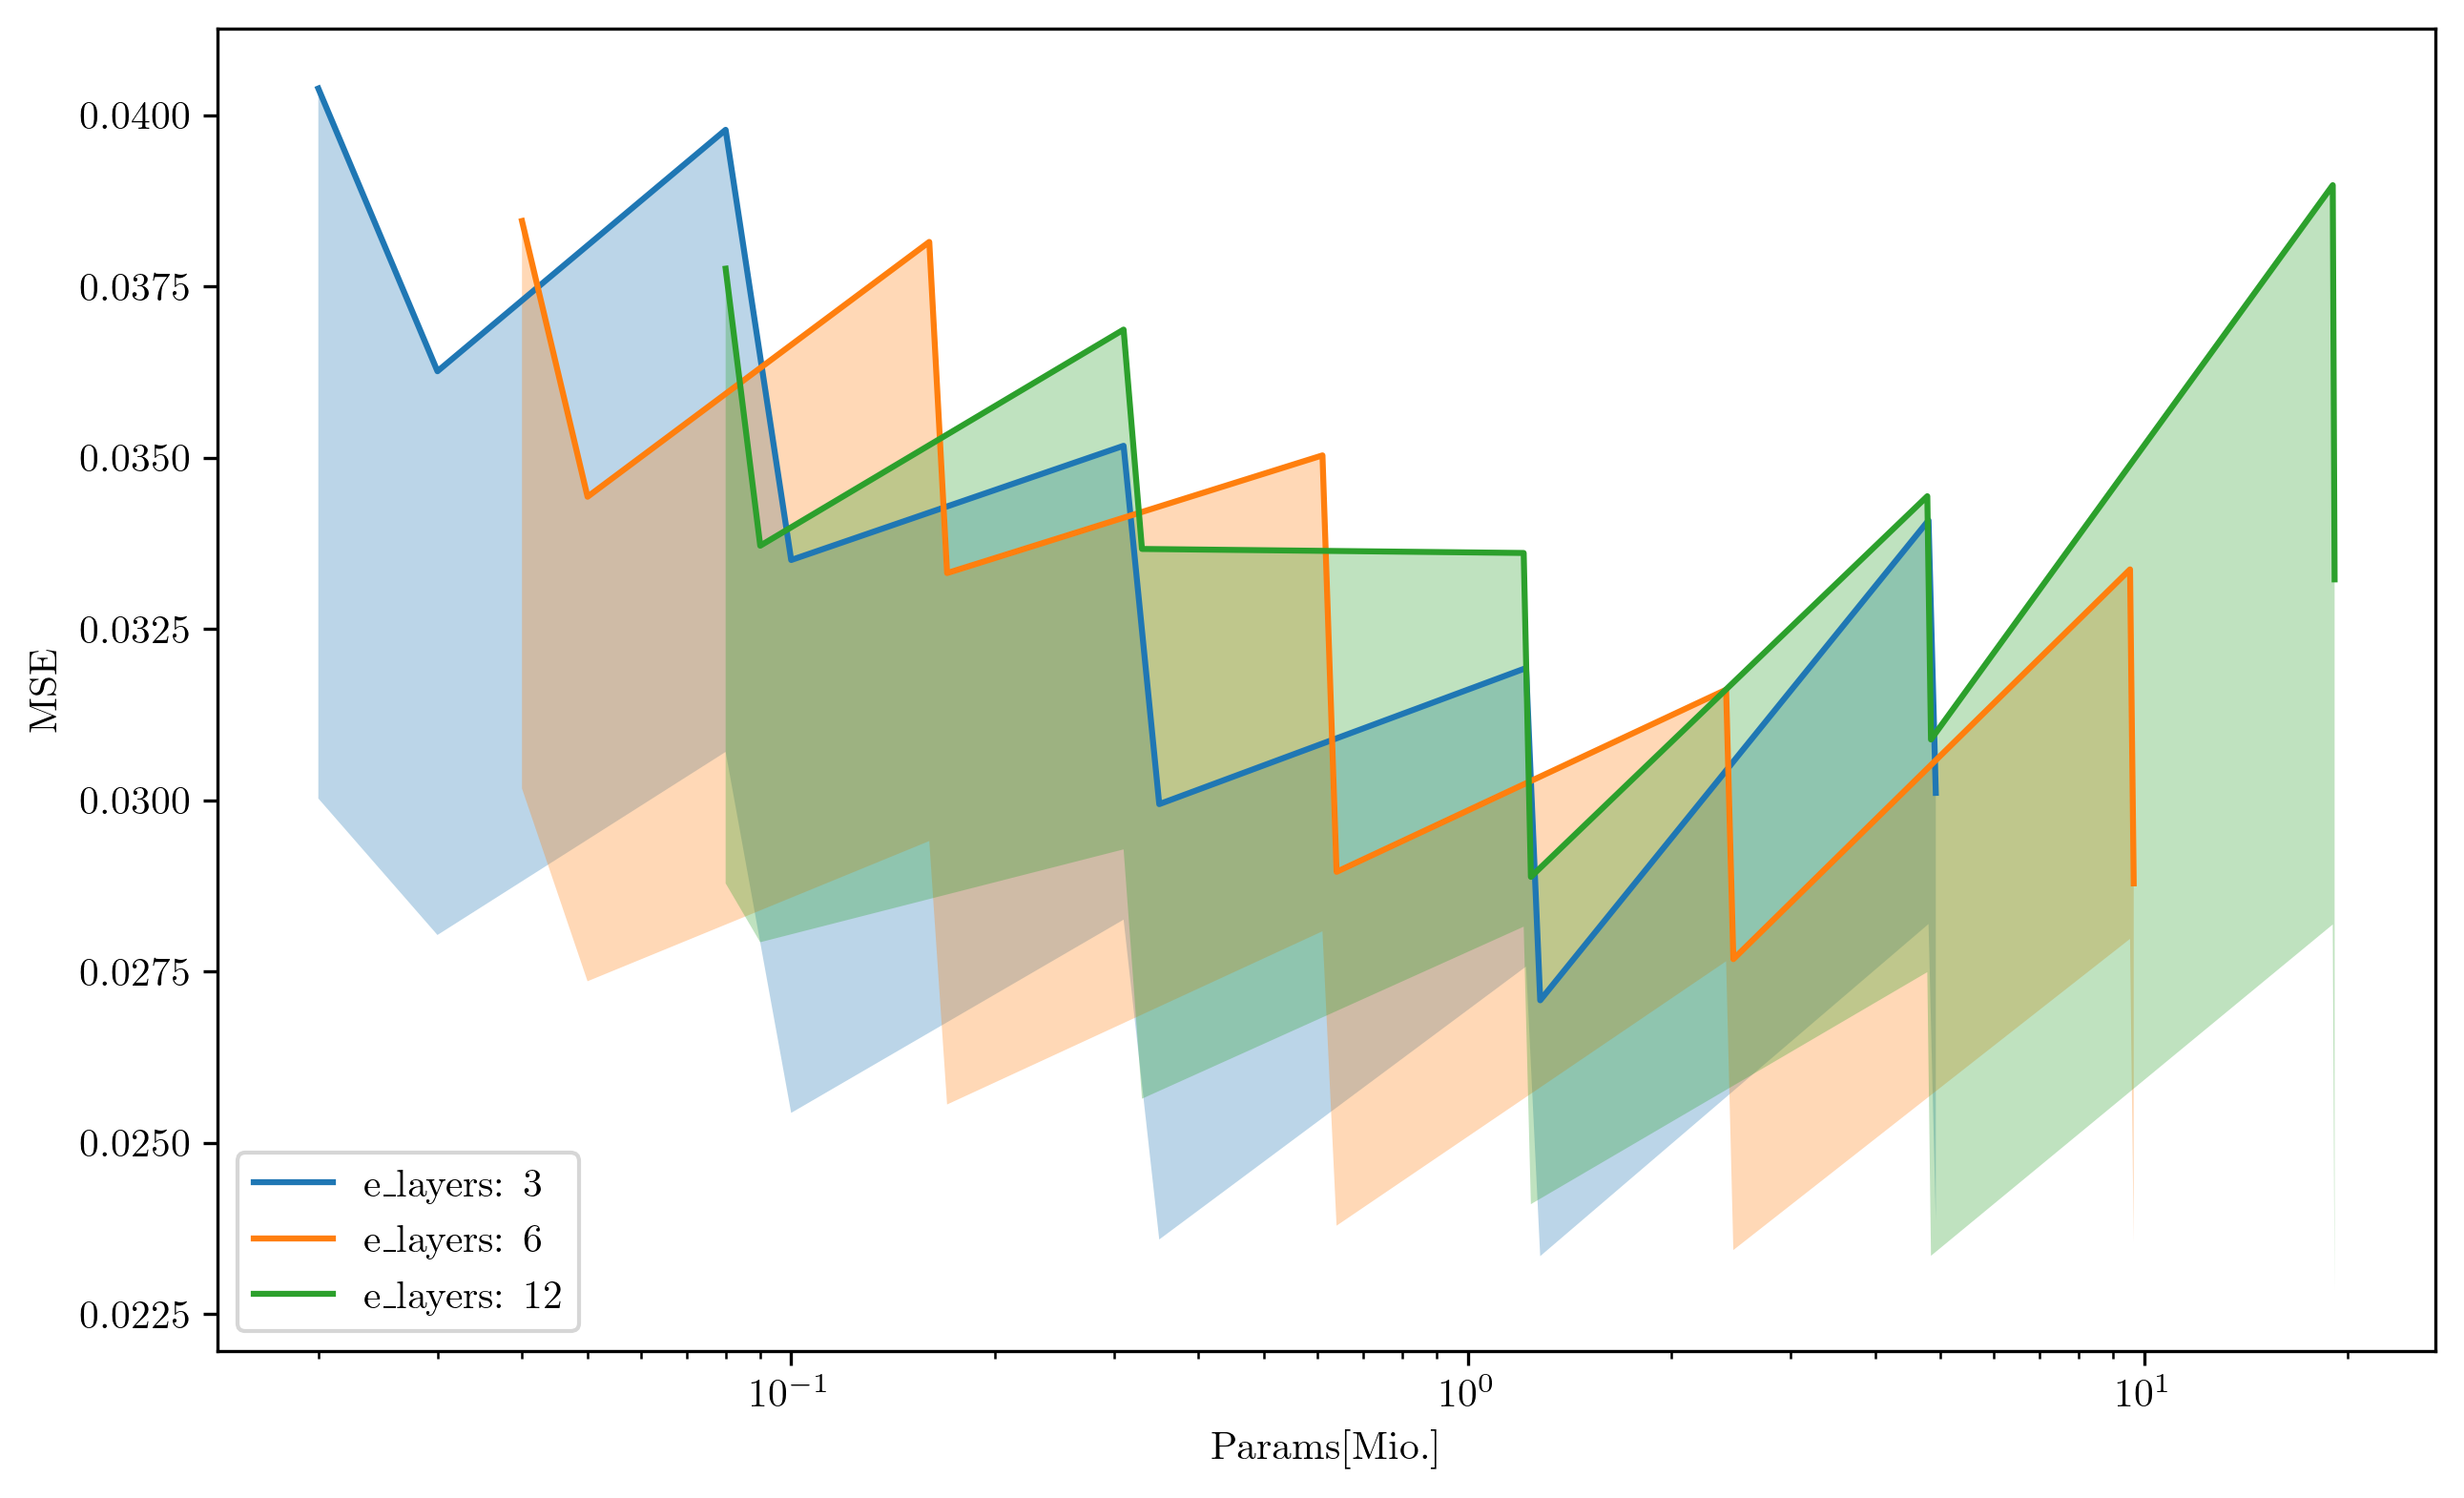

In [47]:
mc_table = hpo_table.groupby(["e_layers", "Params[Mio.]"]).mean()
mc_min_table = hpo_table.groupby(["e_layers", "Params[Mio.]"]).min()
print(mc_table)
#print(mc_table.xs(2, level="e_layers").index)

#Plot MSE over Params. Each e_layer has a different color
fig, ax = plt.subplots(1,1,figsize=(10, 6))
for i in [3,6, 12]:
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_table.xs(i, level="e_layers")["MSE"], label=f"e_layers: {i}")
    ax.fill_between(mc_table.xs(i, level="e_layers").index, mc_min_table.xs(i, level="e_layers")["MSE"], mc_table.xs(i, level="e_layers")["MSE"], alpha=0.3)

ax.set_xlabel("Params[Mio.]")
ax.set_ylabel("MSE")
ax.legend()
ax.set_xscale("log")
plt.show()

In [35]:
hpo_table[hpo_table["MSE"]<0.08].groupby("batch_size").mean()

learning_rate  e_layers  d_layers  d_model  seq_len  pred_len  \
batch_size                                                                  
32                0.00165       7.0       1.0    198.4    216.0      24.0   

                 MSE       MAE     Epochs  Time[min]  Params[Mio.]  \
batch_size                                                           
32          0.033667  0.127362  10.608333      6.925      2.994667   

            Max_mem[MB]  
batch_size               
32              199.954

In [36]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
29          0.0001          32        12         1      512      336   
67          0.0010          32         3         1      256      336   
57          0.0005          32        12         1      256      336   
37          0.0005          32         3         1      256      336   
47          0.0005          32         6         1      256      336   
19          0.0001          32         6         1      512      336   
65          0.0010          32         3         1      128      336   
75          0.0010          32         6         1      128      336   
39          0.0005          32         3         1      512      336   
55          0.0005          32        12         1      128      336   
9           0.0001          32         3         1      512      336   
77          0.0010          32         6         1      256      336   
45          0.0005          32         6         1      128      336   
49          0.0005          32         6         1      512      336   
85          0.0010          32        12         1      128      336   
27          0.0001          32        12         1      256      336   
35          0.0005          32         3         1      128      336   
63          0.0010          32         3         1       64      336   
73          0.0010          32         6         1       64      336   
17          0.0001          32         6         1      256      336   
83          0.0010          32        12         1       64      336   
53          0.0005          32        12         1       64      336   
43          0.0005          32         6         1       64      336   
7           0.0001          32         3         1      256      336   
101         0.0050          32         6         1       32      336   
56          0.0005          32        12         1      256       96   
66          0.0010          32         3         1      256       96   
33          0.0005          32         3         1       64      336   
76          0.0010          32         6         1      256       96   
111         0.0050          32        12         1       32      336   
46          0.0005          32         6         1      256       96   
48          0.0005          32         6         1      512       96   
91          0.0050          32         3         1       32      336   
74          0.0010          32         6         1      128       96   
84          0.0010          32        12         1      128       96   
28          0.0001          32        12         1      512       96   
38          0.0005          32         3         1      512       96   
64          0.0010          32         3         1      128       96   
36          0.0005          32         3         1      256       96   
54          0.0005          32        12         1      128       96   
81          0.0010          32        12         1       32      336   
18          0.0001          32         6         1      512       96   
44          0.0005          32         6         1      128       96   
110         0.0050          32        12         1       32       96   
26          0.0001          32        12         1      256       96   
25          0.0001          32        12         1      128      336   
82          0.0010          32        12         1       64       96   
8           0.0001          32         3         1      512       96   
72          0.0010          32         6         1       64       96   
71          0.0010          32         6         1       32      336   

     pred_len       MSE       MAE  Epochs  Time[min]  Params[Mio.]  \
29         24  0.022838  0.109237       9         10         19.12   
67         24  0.023343  0.107170      14          7          1.28   
57         24  0.023348  0.111572       9         10          4.84   
37         24  0.023409  0.107448      13          6

In [37]:
average_model = sorted_df.iloc[0:10].describe().iloc[1:3]
best_model = sorted_df.iloc[0:3]
worst_model = sorted_df.iloc[-1:]

overview_models = pd.concat([average_model, worst_model, best_model], axis=0)

overview_models.rename(index={"mean":"Mean Top10", "std":"Std Top10"}, inplace=True)
overview_models.drop(columns=["MAE", "batch_size", "d_layers", "Time[min]", "Max_mem[MB]", "pred_len"], inplace=True)
overview_models.rename(columns={"learning_rate": "Lr", "e_layers": "Enc. layers", "d_model": "D. model", "seq_len": "Seq. len."}, inplace=True)
overview_models = overview_models.sort_index(axis=1)
overview_models = overview_models.round(4)
mse_column, lr_column, epoch_column = overview_models.pop("MSE"), overview_models.pop("Lr"), overview_models.pop("Epochs")
overview_models.insert(4, "Epochs", epoch_column)
overview_models= overview_models.round(2)

overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]] = overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]].astype(int)

overview_models.insert(0, "Lr", lr_column)
overview_models.insert(6, "MSE", mse_column)
overview_models

Lr  D. model  Enc. layers  Params[Mio.]  Seq. len.  Epochs  \
Mean Top10  0.0006       294            6          4.58        336      12   
Std Top10   0.0003       160            3          5.85          0       2   
0           0.0001        32            3          0.02         96      17   
29          0.0001       512           12         19.12        336       9   
67          0.0010       256            3          1.28        336      14   
57          0.0005       256           12          4.84        336       9   

               MSE  
Mean Top10  0.0235  
Std Top10   0.0003  
0           0.0541  
29          0.0228  
67          0.0233  
57          0.0233

In [38]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0228381212800741

## Learning rate vs MSE

In [39]:
list(hpo_table["Params[Mio.]"].value_counts().sort_index().index)

[0.02,
 0.03,
 0.04,
 0.05,
 0.08,
 0.09,
 0.1,
 0.16,
 0.17,
 0.31,
 0.33,
 0.35,
 0.61,
 0.64,
 1.21,
 1.22,
 1.24,
 1.28,
 2.41,
 2.47,
 4.78,
 4.8,
 4.84,
 4.92,
 9.53,
 9.65,
 19.0,
 19.12]

## Params[Mio.] vs MSE

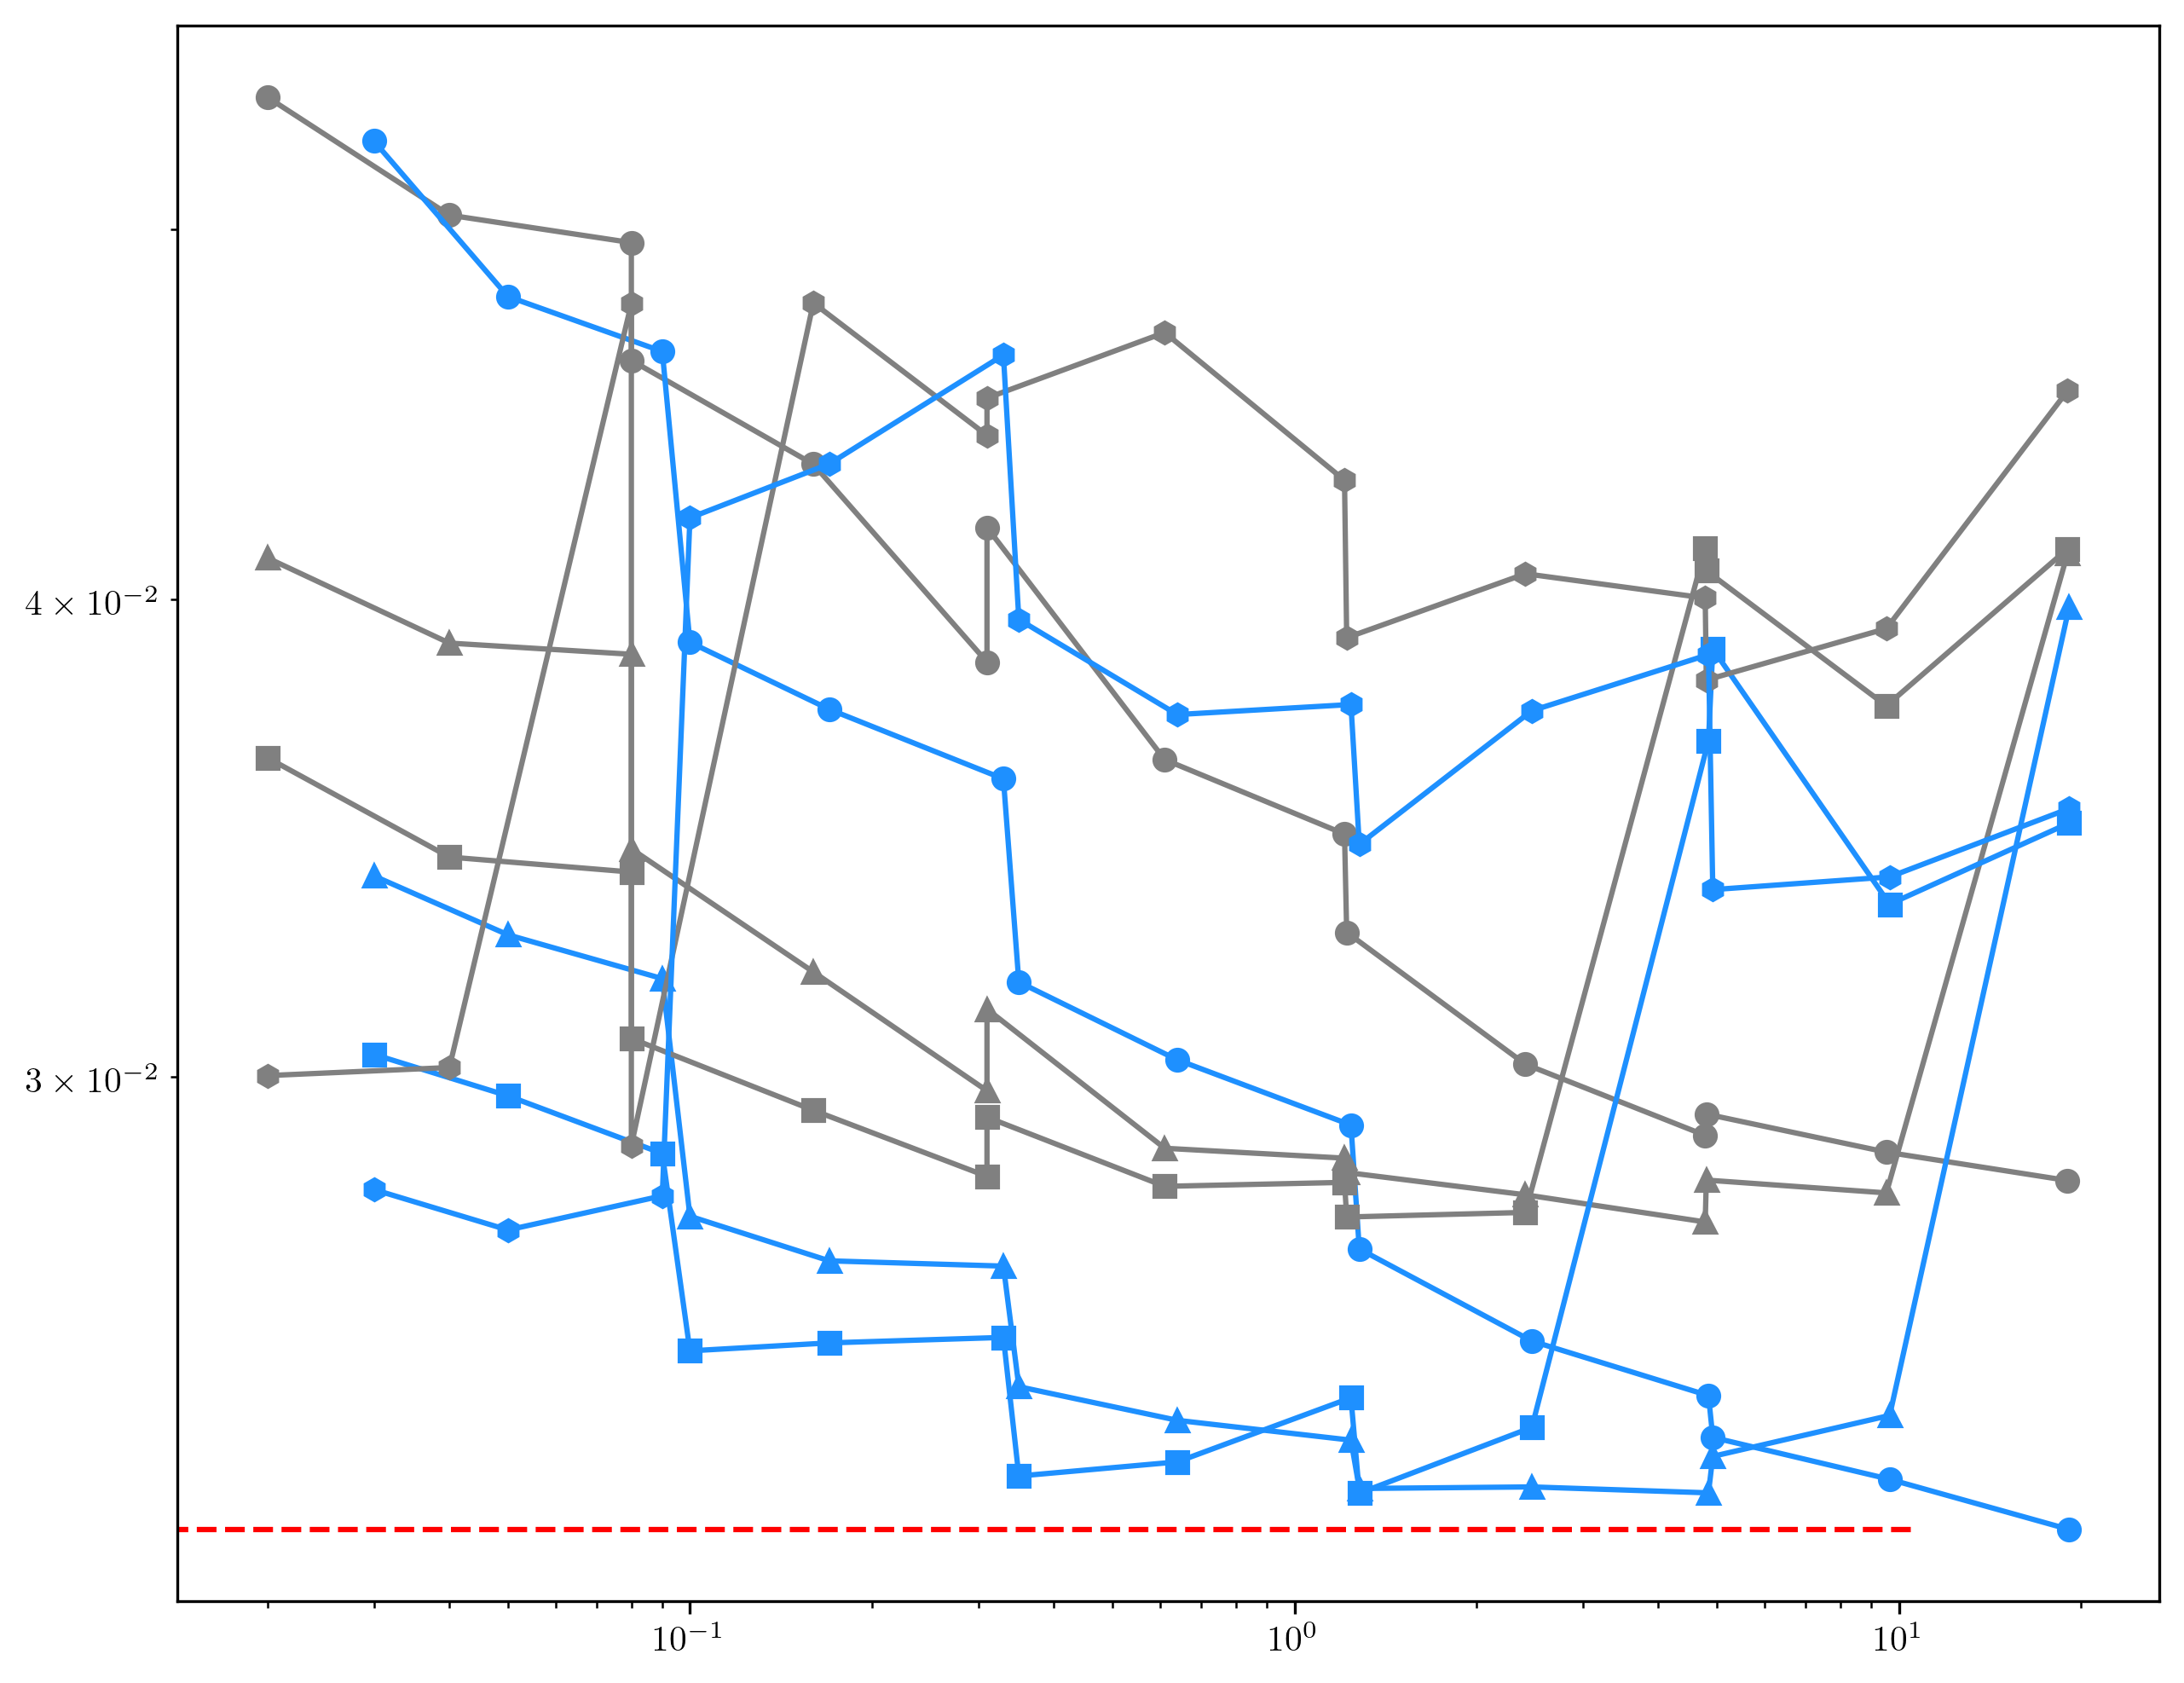

In [40]:
colors = {96: "grey", 336: "dodgerblue", 128: "darkblue"}
markers = {0.0001: 'o', 0.0005: '^', 0.001: 's', 0.005: 'h'}
seq_lens = [96, 336]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001, 0.005]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for sl in seq_lens:
        hpo_table_subset = hpo_table[(hpo_table["seq_len"] == sl) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[sl], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)
ax.set_xscale("log")
#ax.set_yscale("log")



In [41]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  \
90          0.0050          32         3         1       32       96   
60          0.0010          32         3         1       32       96   
30          0.0005          32         3         1       32       96   
0           0.0001          32         3         1       32       96   
91          0.0050          32         3         1       32      336   
..             ...         ...       ...       ...      ...      ...   
118         0.0050          32        12         1      512       96   
29          0.0001          32        12         1      512      336   
89          0.0010          32        12         1      512      336   
119         0.0050          32        12         1      512      336   
59          0.0005          32        12         1      512      336   

     pred_len       MSE       MAE  Epochs  Time[min]  Params[Mio.]  \
90         24  0.030023  0.119603      13          4          0.02   
60         24  0.036363  0.130126      13          4          0.02   
30         24  0.041016  0.139025      13          4          0.02   
0          24  0.054144  0.164483      17          6          0.02   
91         24  0.028031  0.118504      14          7          0.03   
..        ...       ...       ...     ...        ...           ...   
118        24  0.045361  0.150647       4          4         19.00   
29         24  0.022838  0.109237       9         10         19.12   
89         24  0.034960  0.134023       4          4         19.12   
119        24  0.035266  0.136243       4          4         19.12   
59         24  0.039821  0.142513       4          4         19.12   

     Max_mem[MB]  
90        146.61  
60        146.61  
30        146.61  
0         146.61  
91        147.43  
..           ...  
118       451.31  
29        454.56  
89        454.56  
119       454.56  
59        454.56  

[120 rows x 13 columns]

In [42]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model"]]
print(reduced_hpo_table.shape)

(120, 7)


In [43]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(10, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00005 
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00005, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    zs[:, -3][zs[:, -3] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=18)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-1].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=18)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="8%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


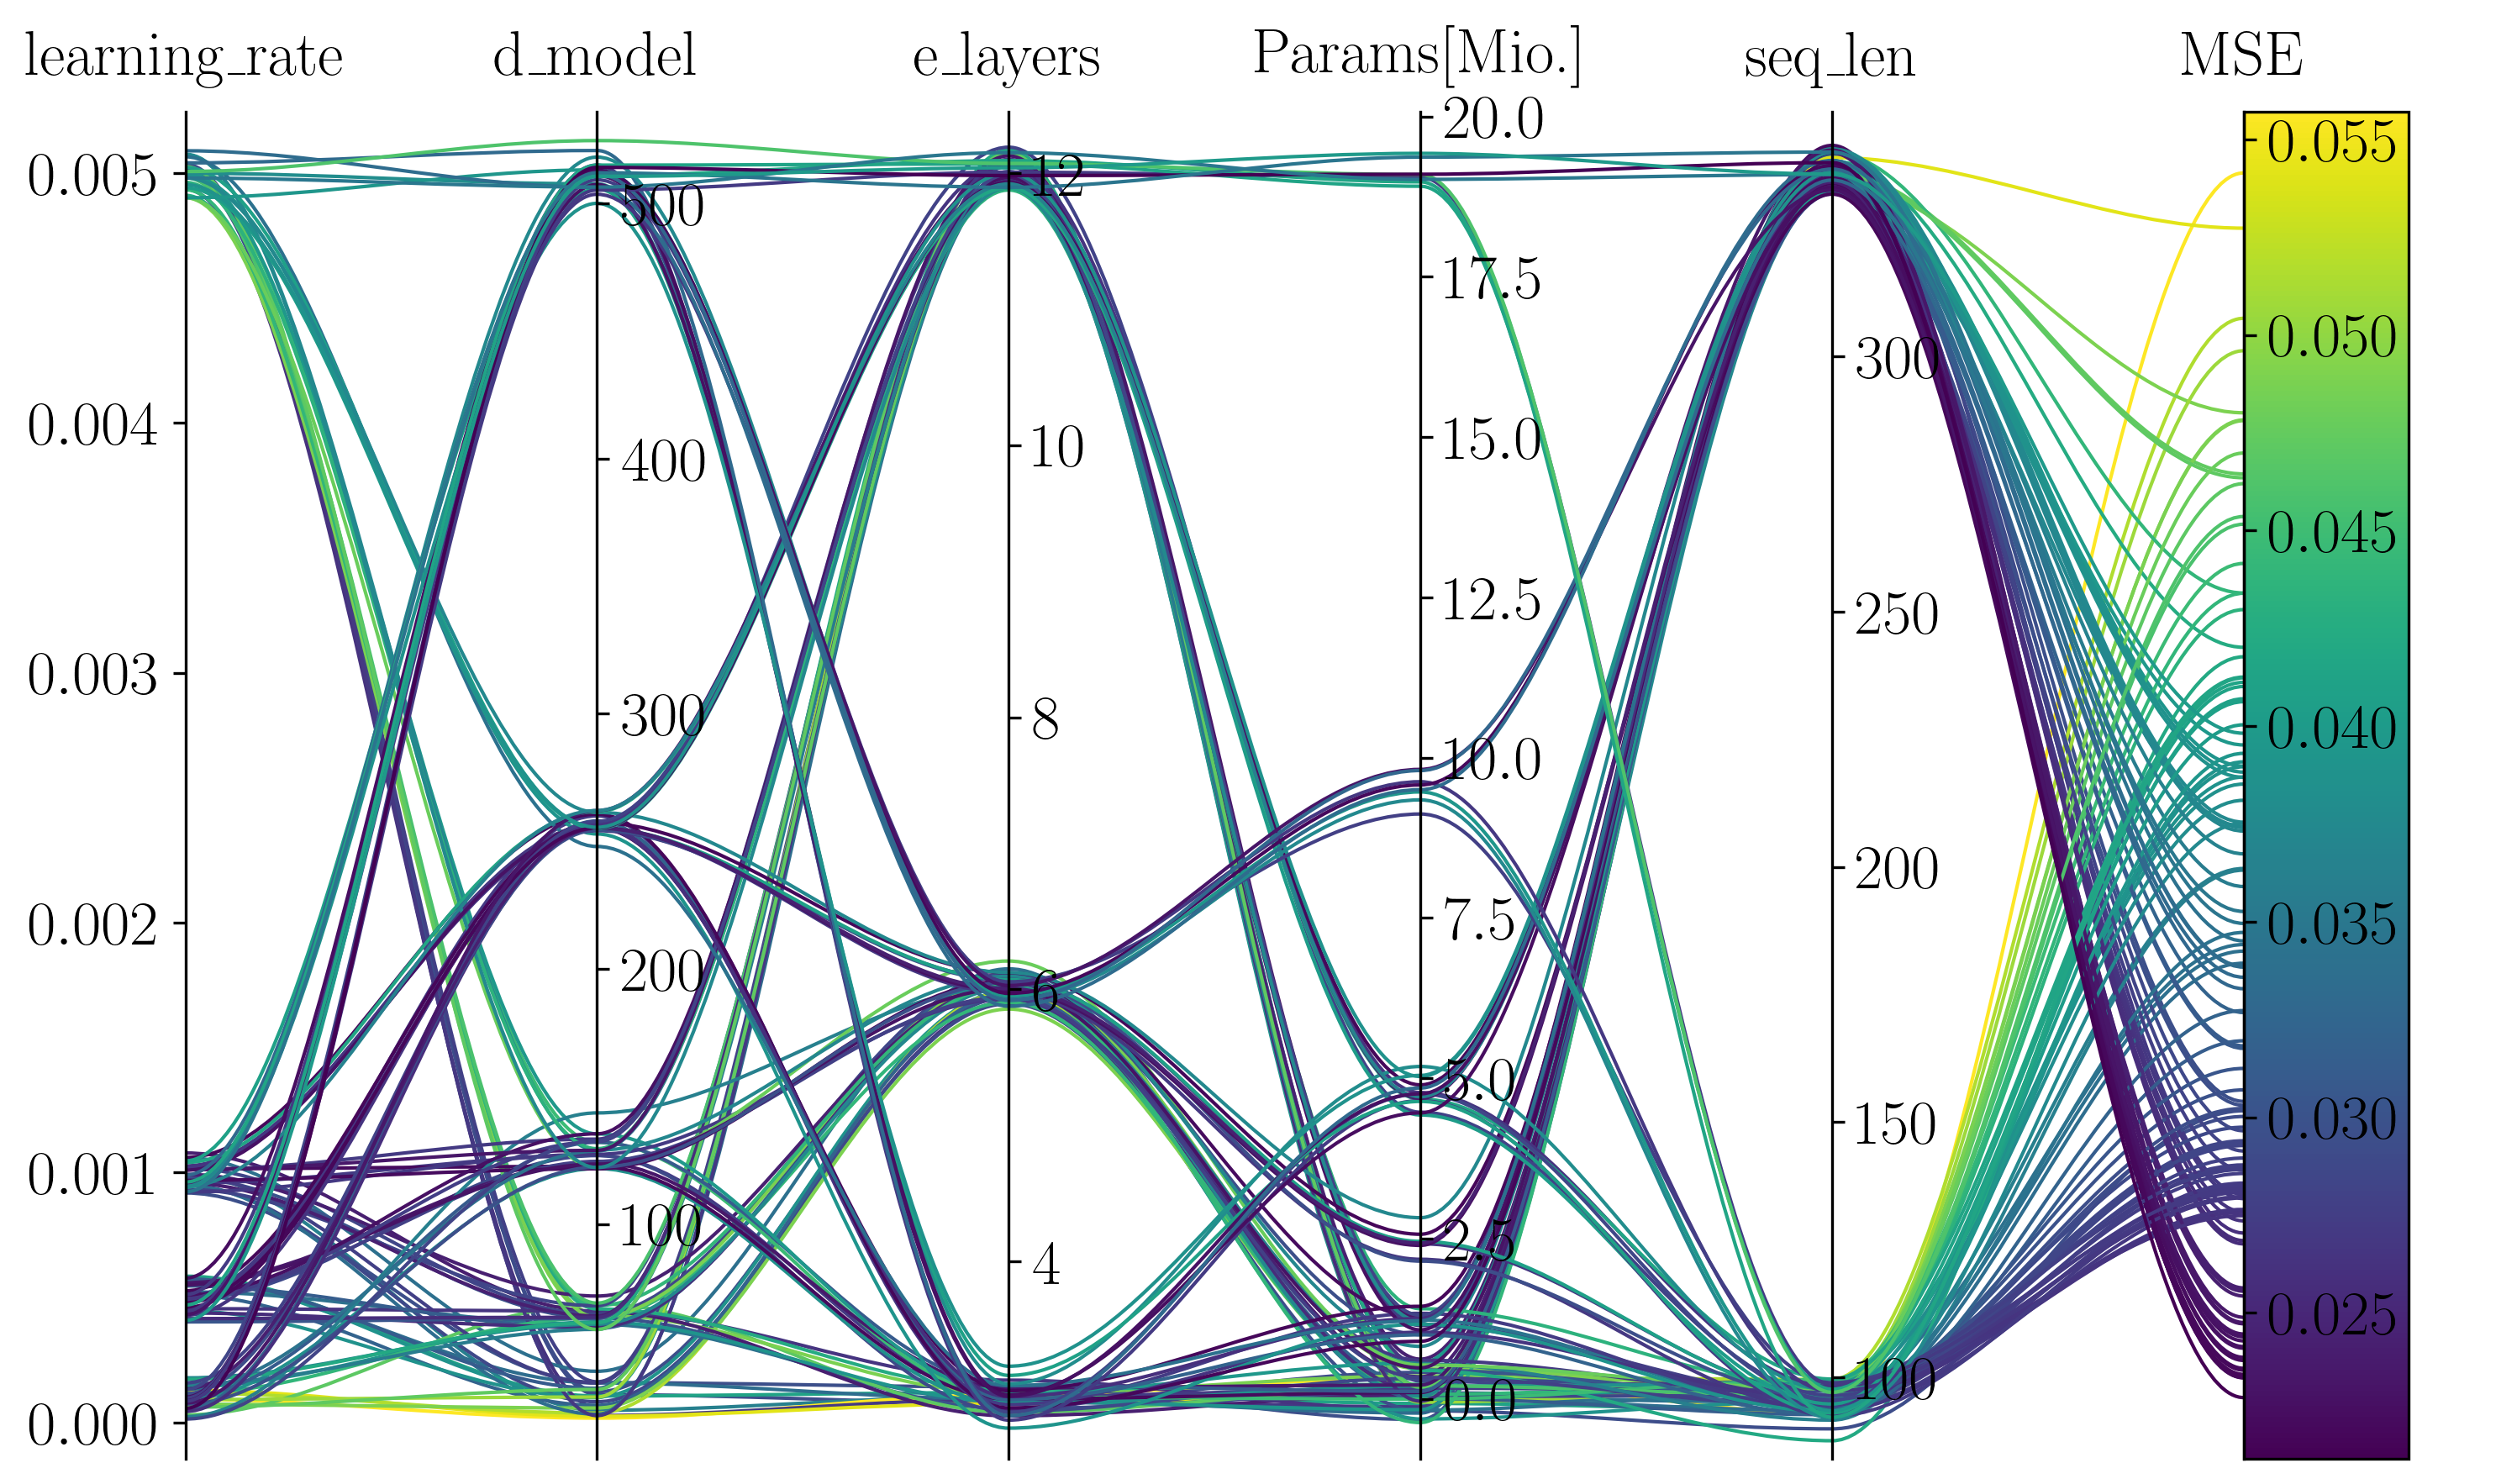

In [44]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"])

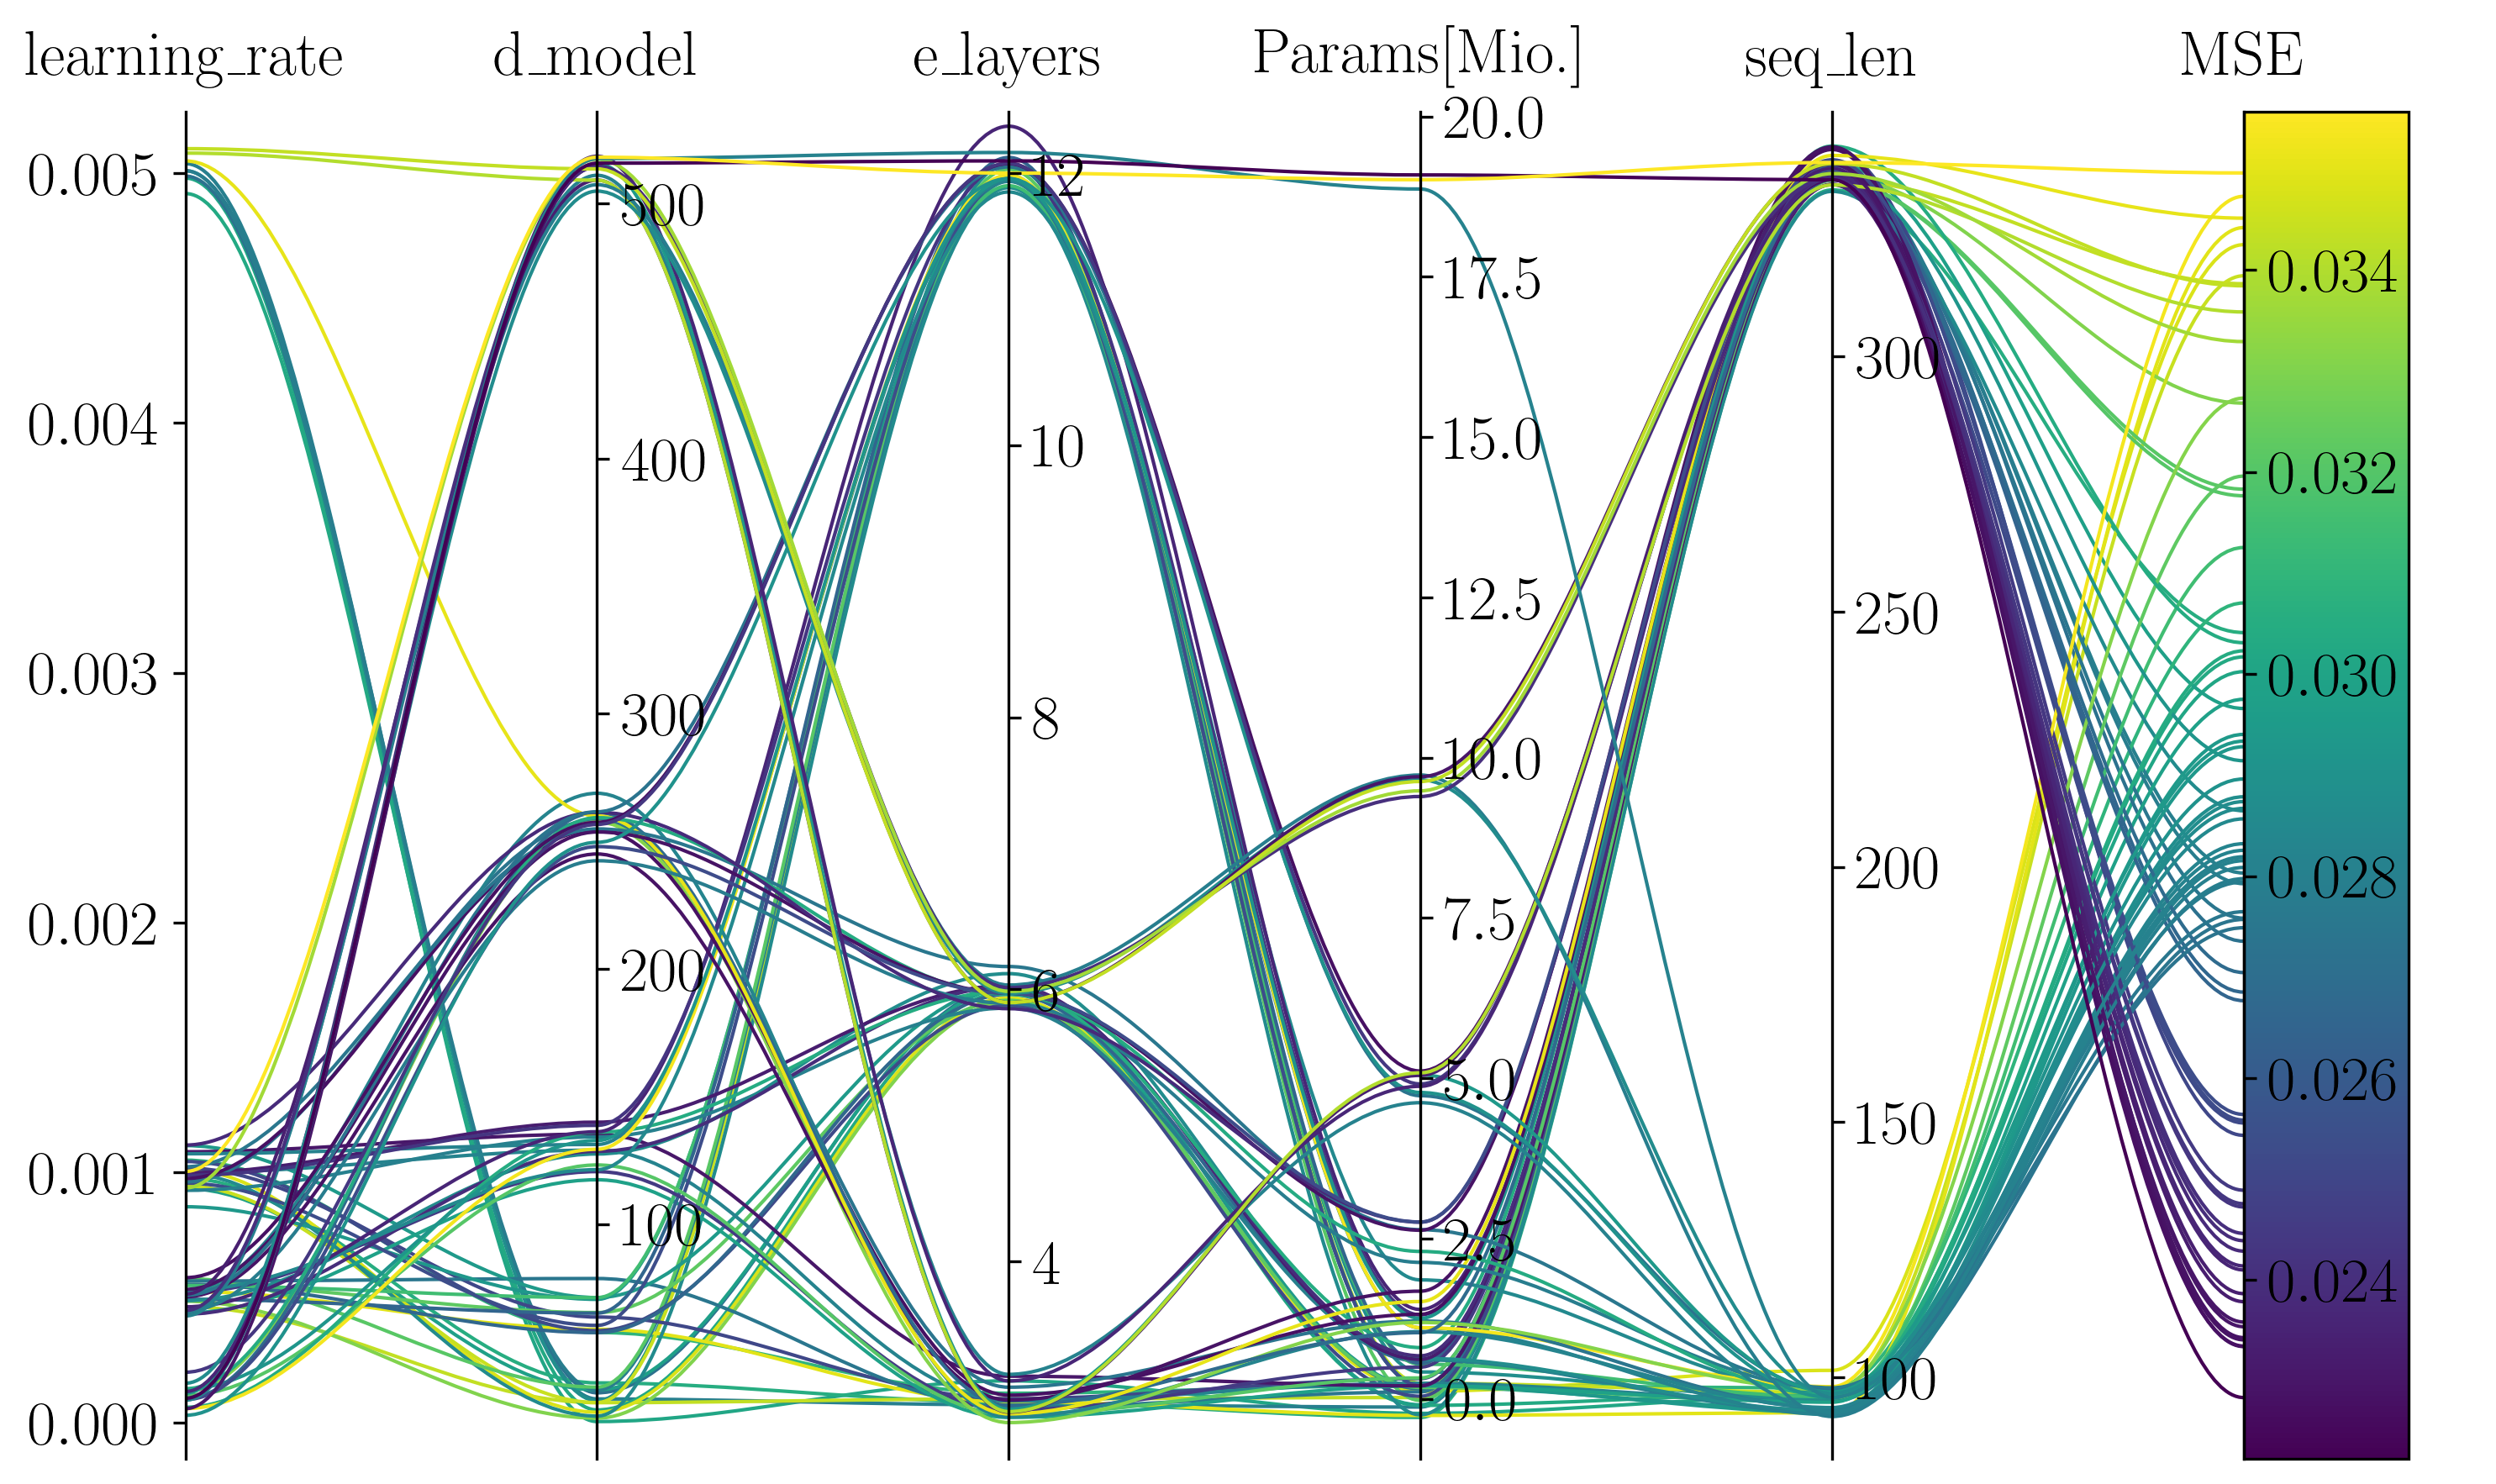

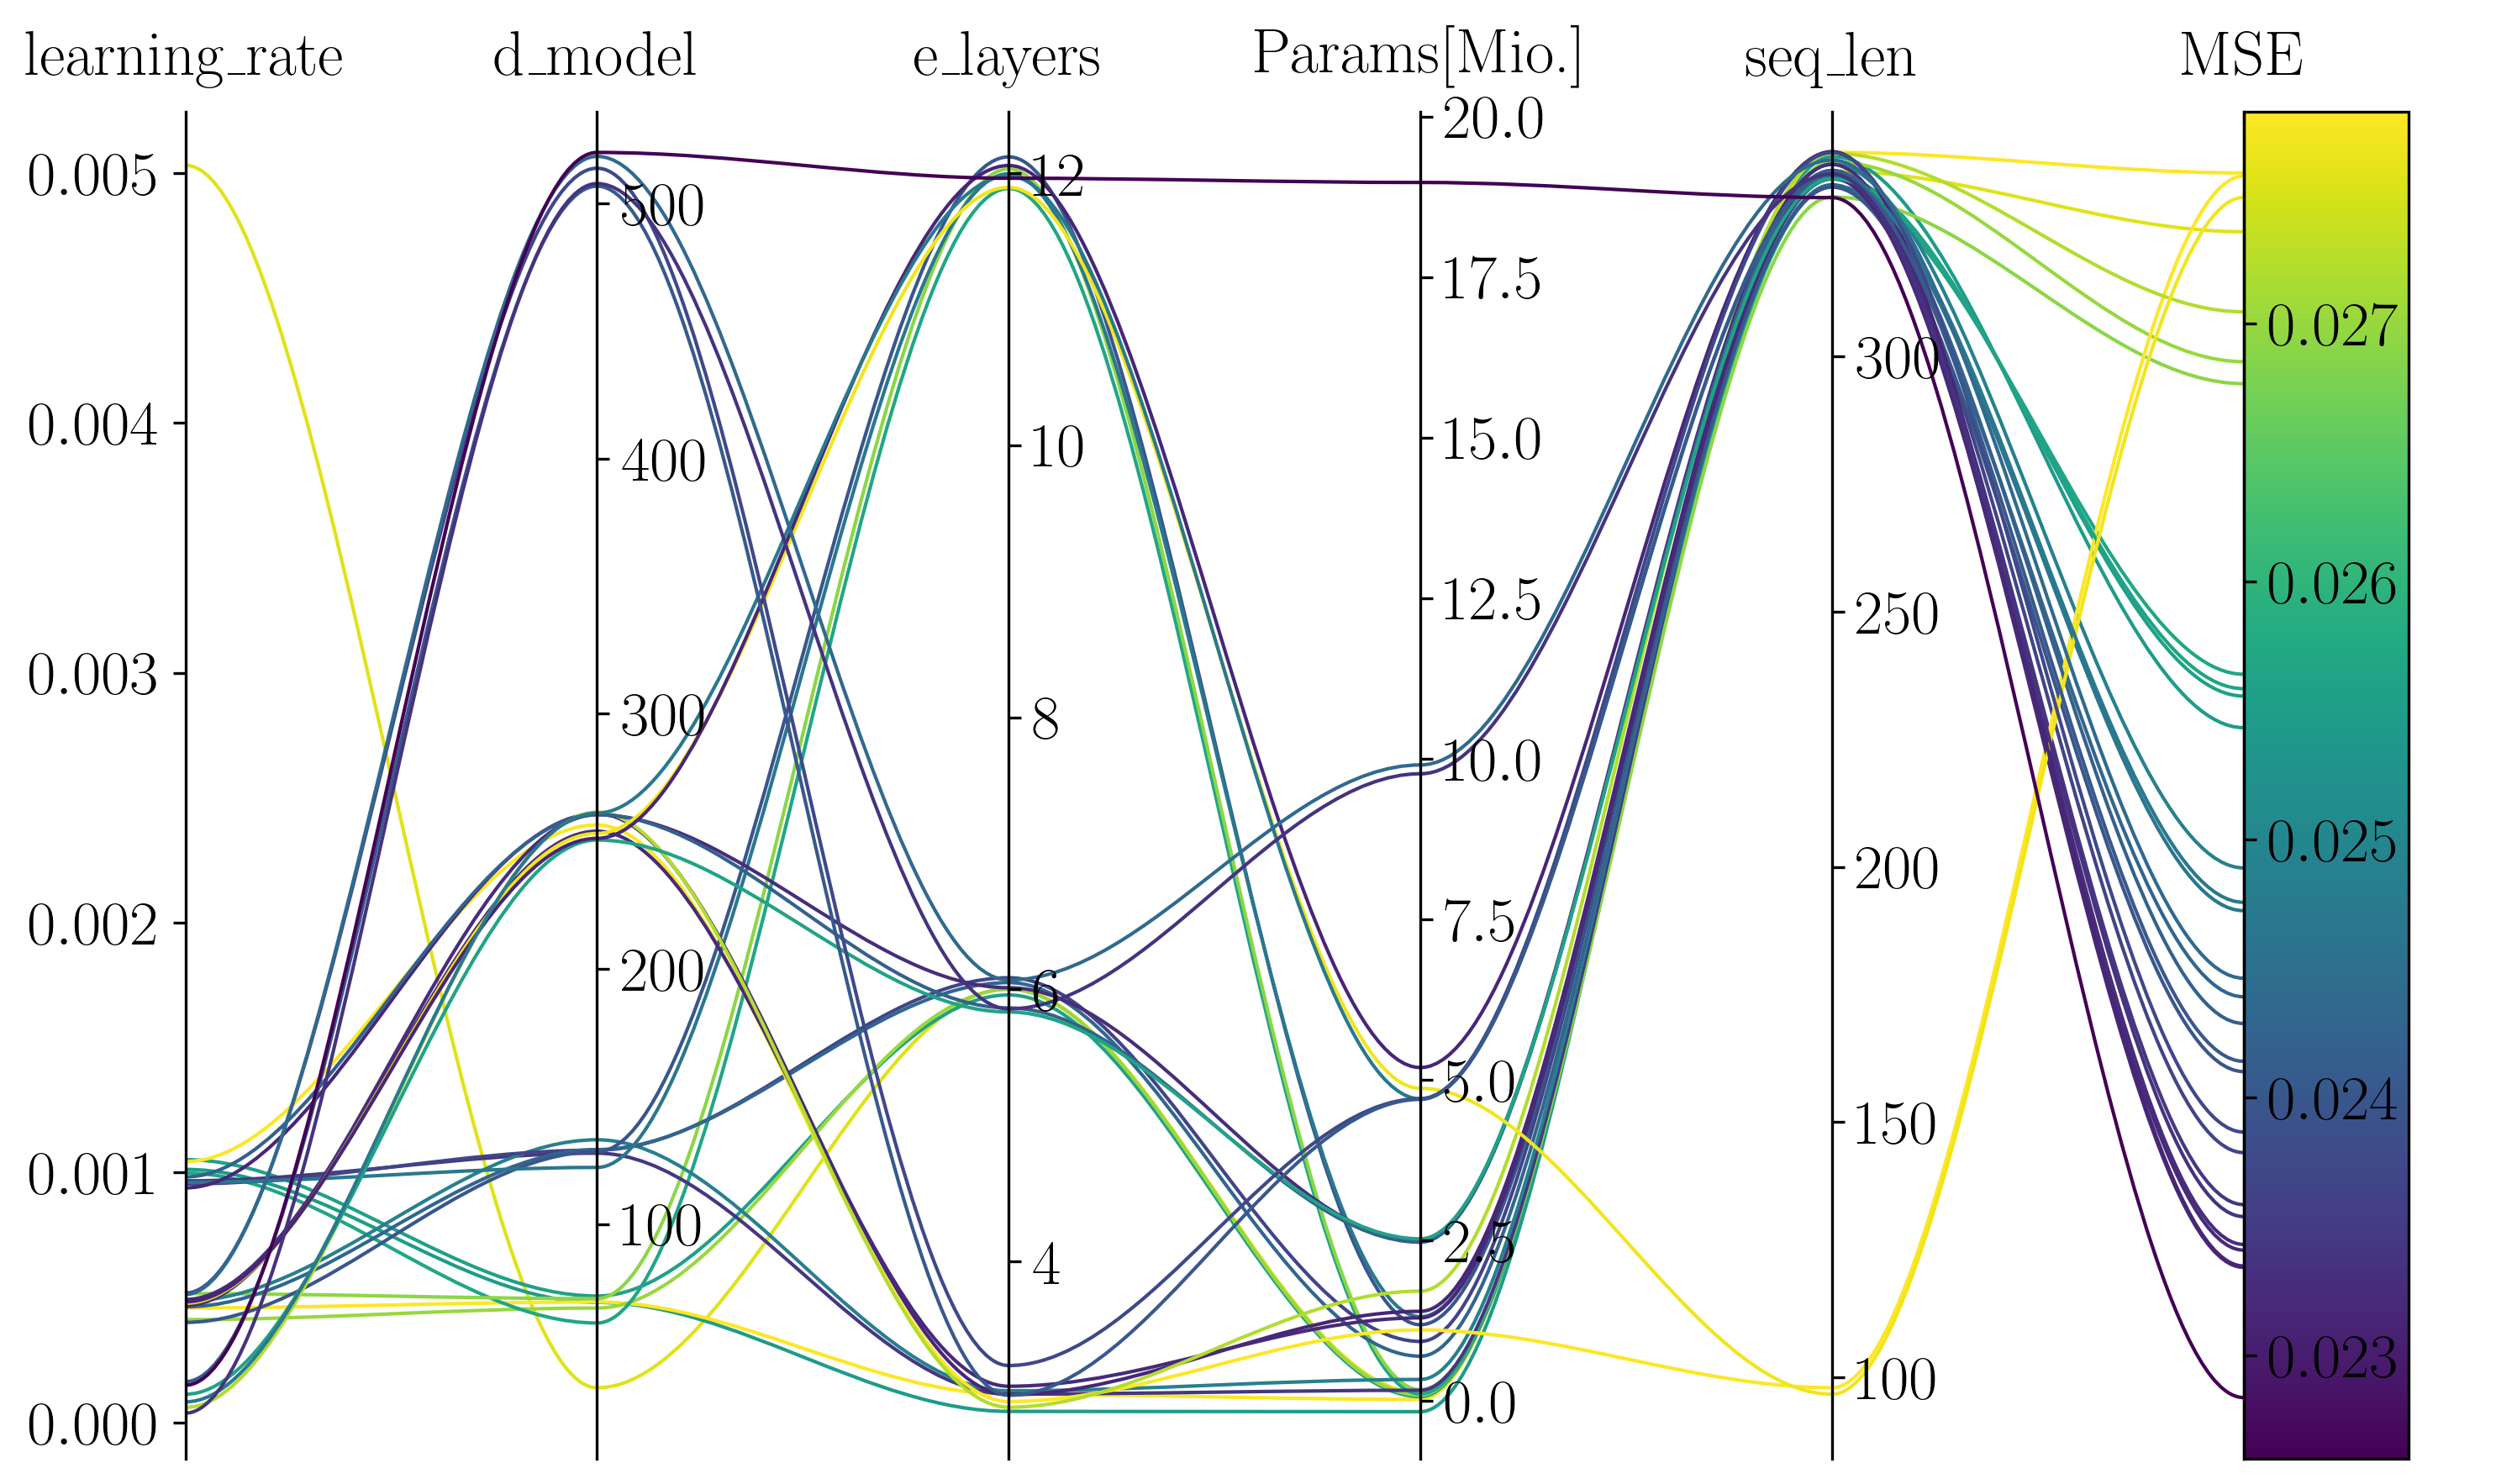

In [45]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.035)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.0276)

ValueError: zero-size array to reduction operation minimum which has no identity

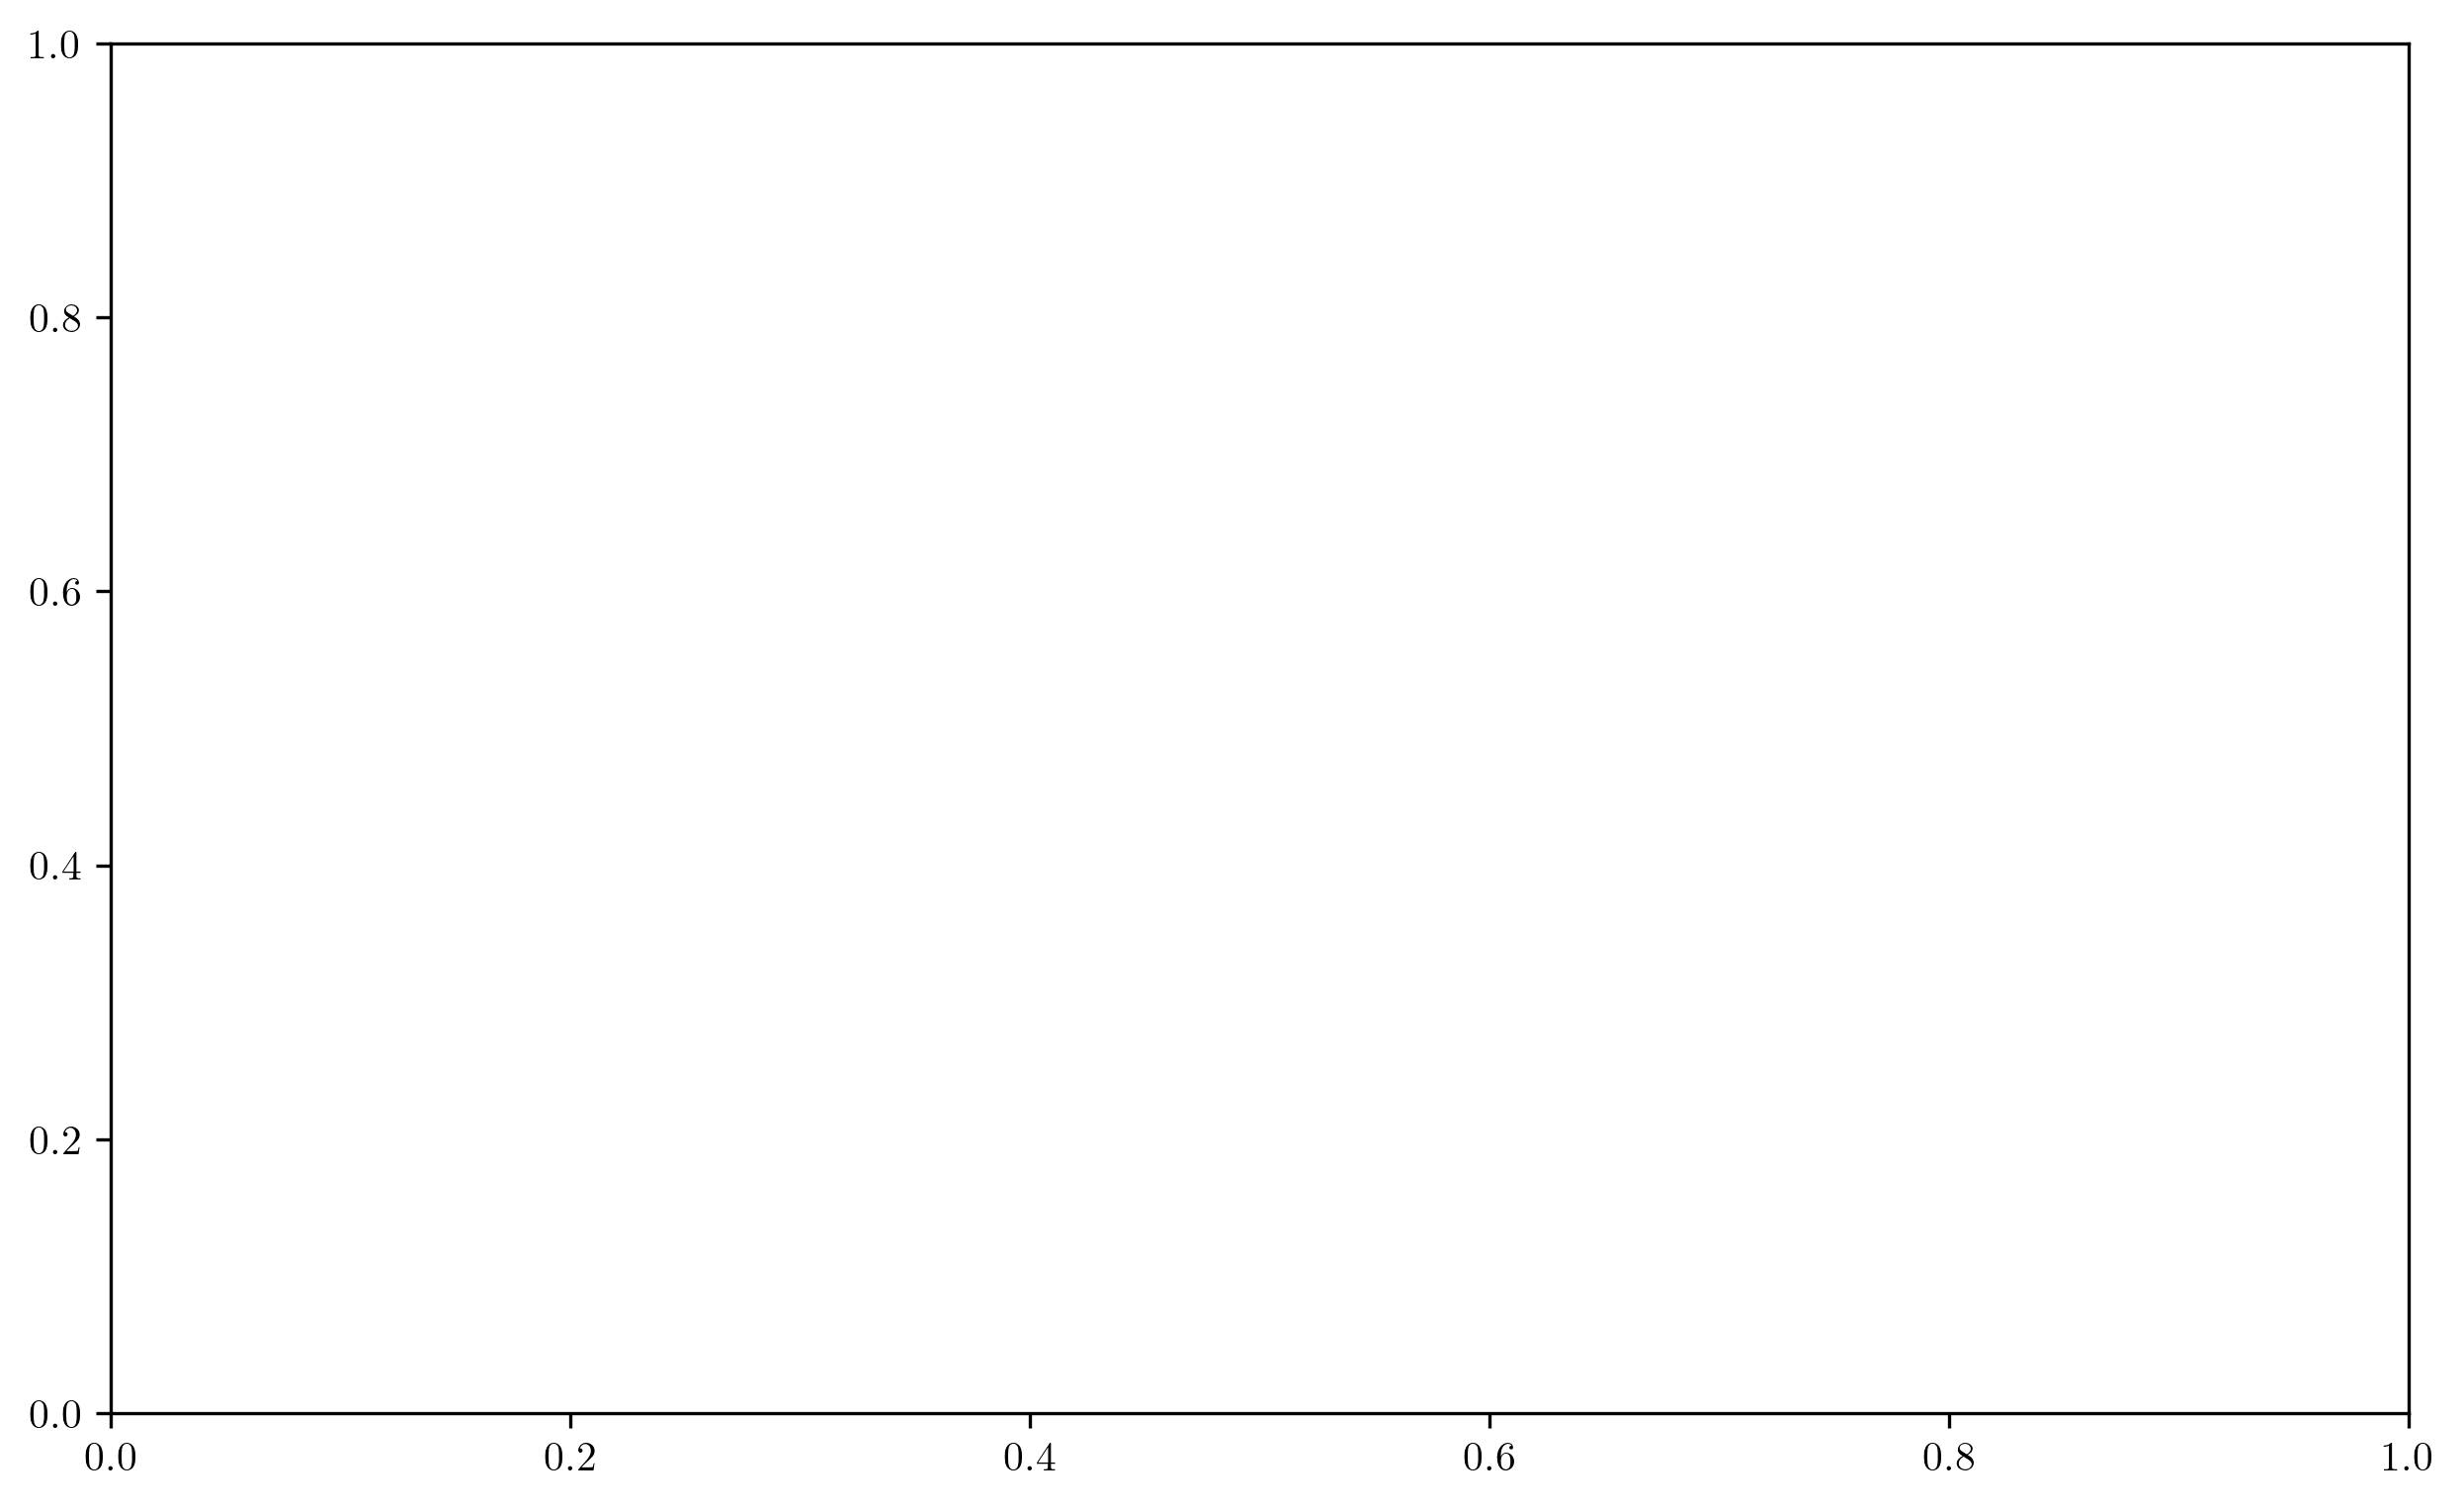

In [46]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])


ValueError: zero-size array to reduction operation minimum which has no identity

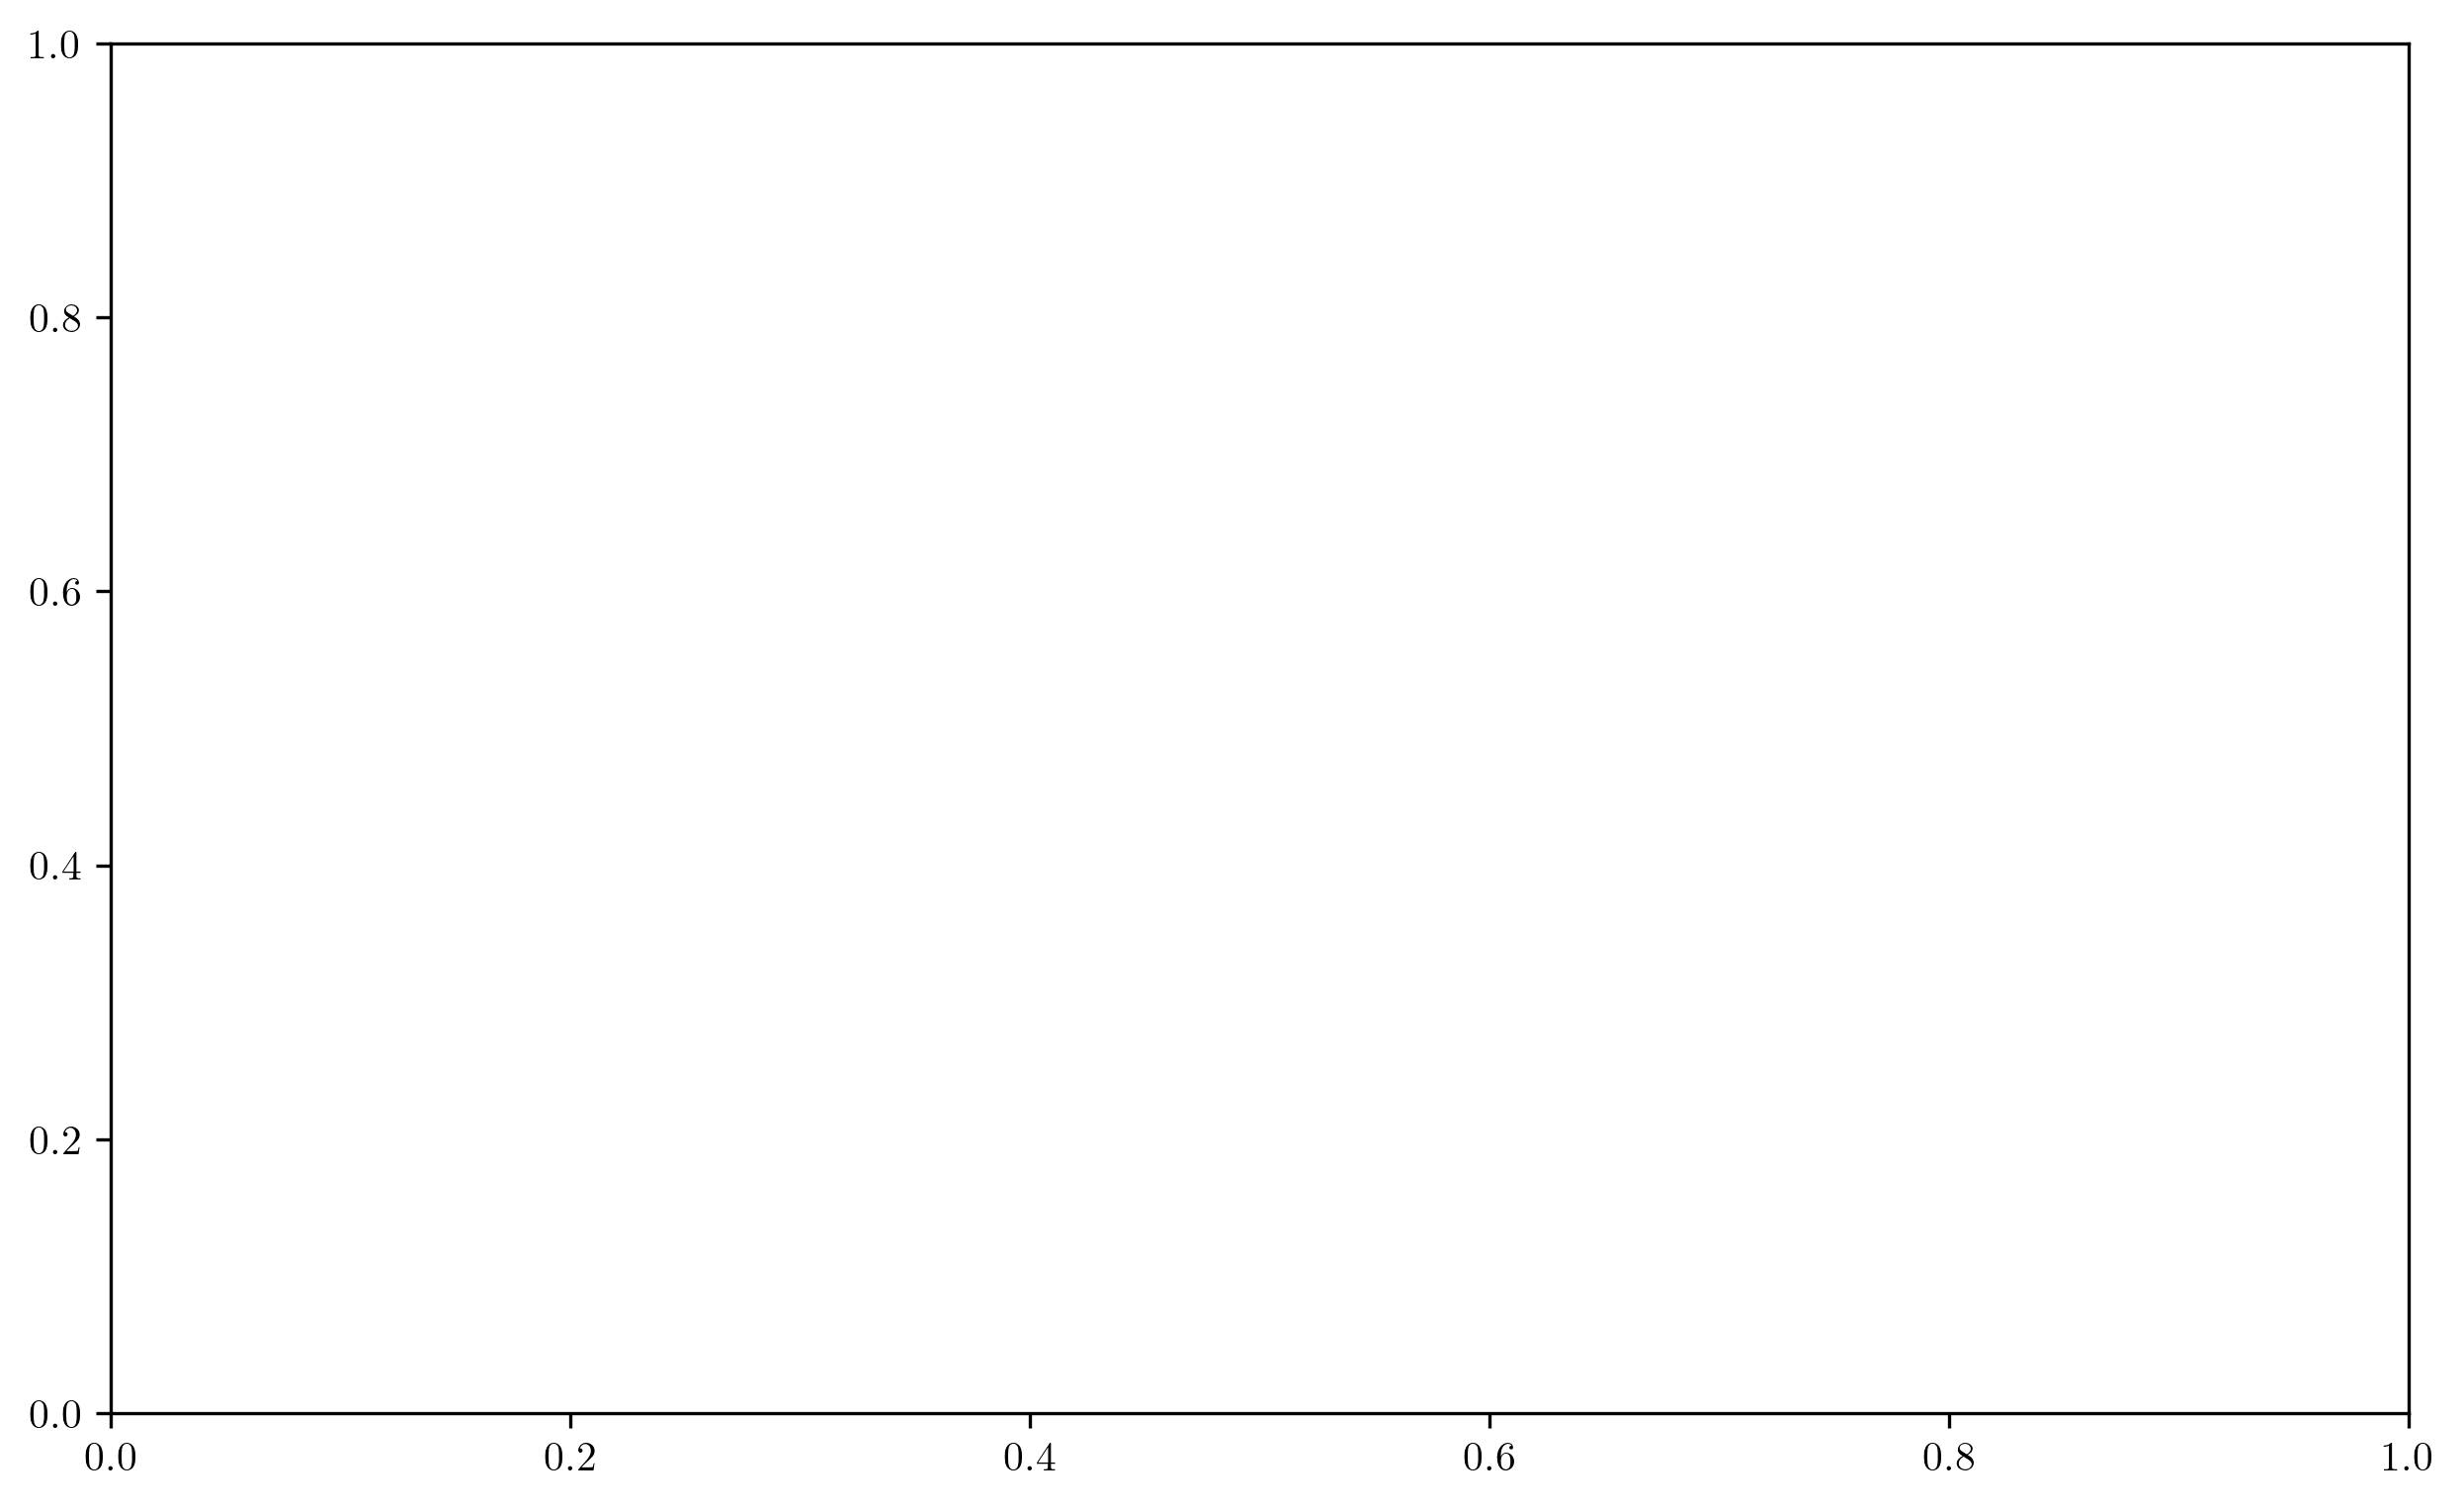

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.7], ["learning_rate", "batch_size", "MSE"])

ValueError: zero-size array to reduction operation minimum which has no identity

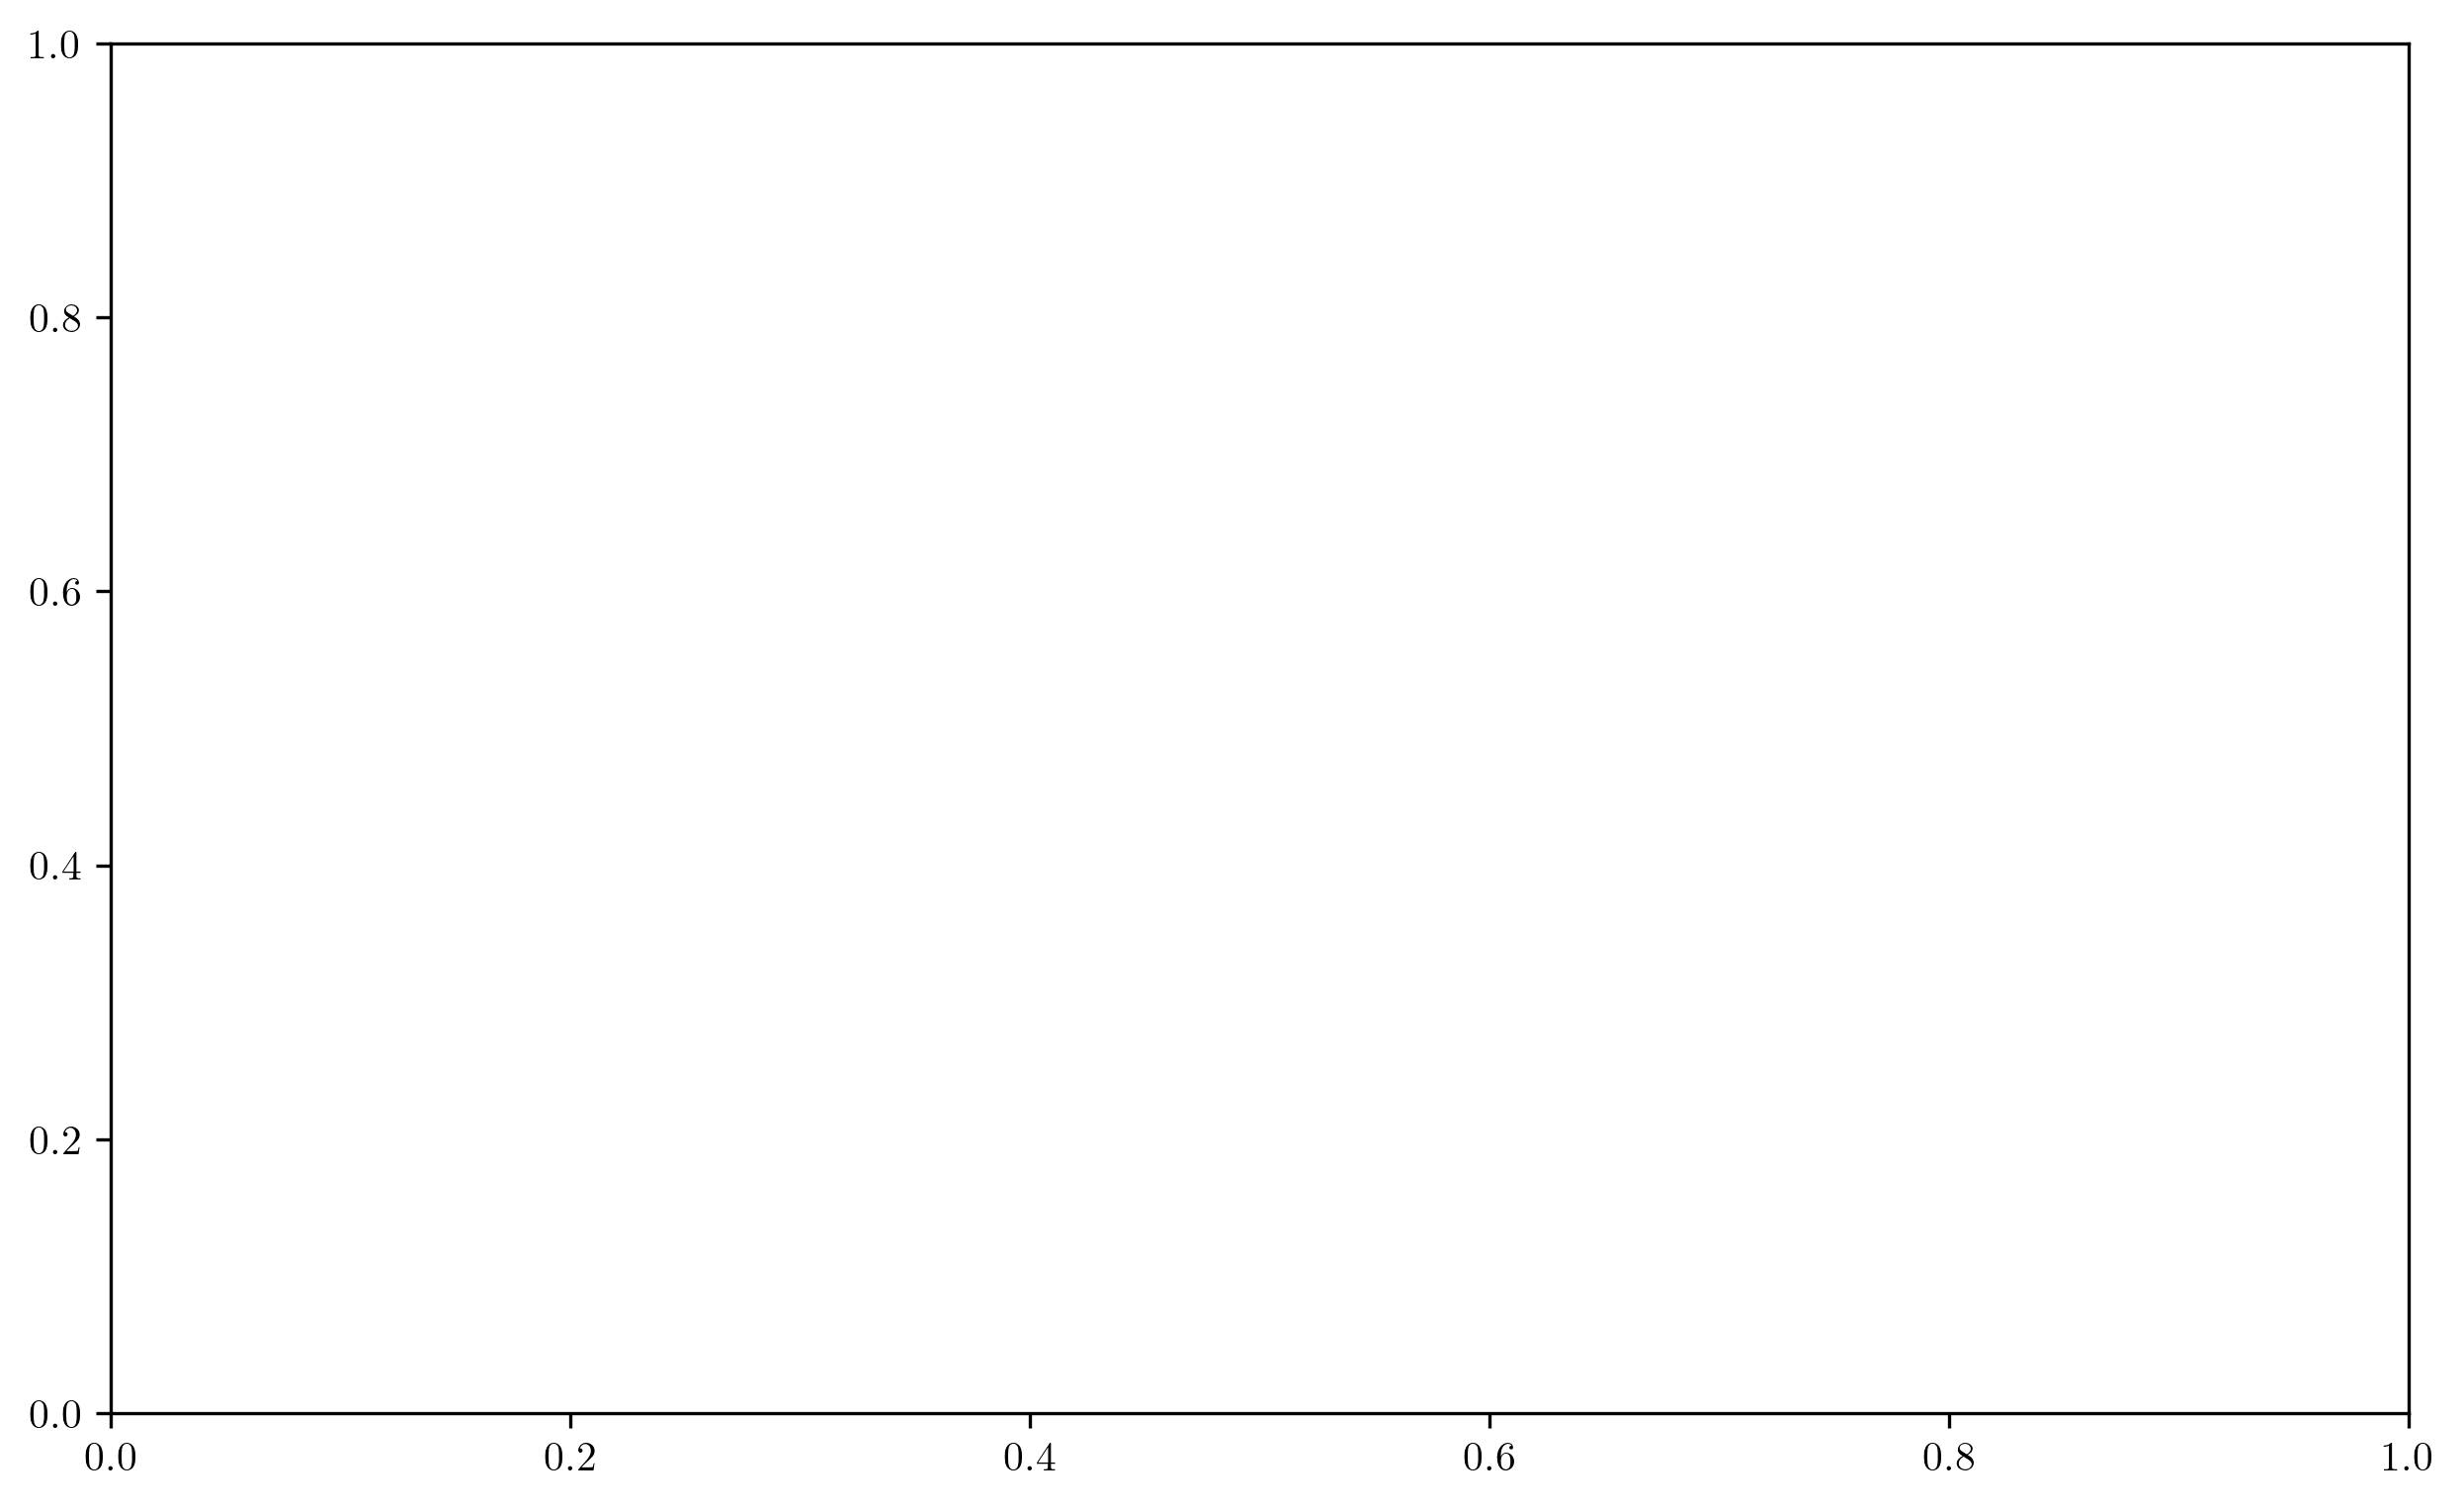

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


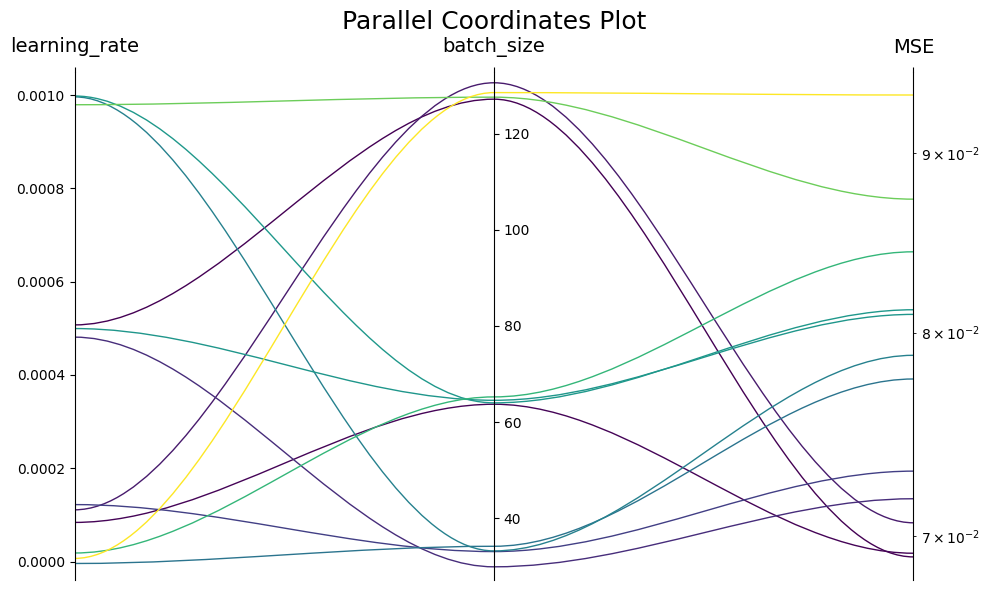

(7, 3)


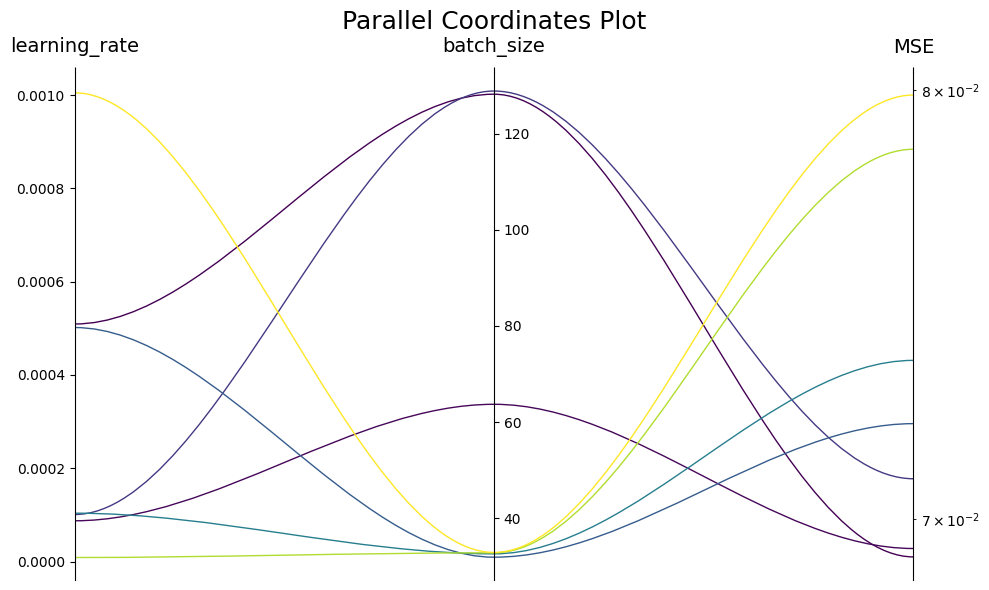

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)